# Bird Strikes in Aviation: Aircraft Collisions 

### Table of Contents
1. [Understanding the Data](#understanding-the-data)
   - [Dataset Description](#dataset-description)
   - [Library Imports](#library-imports)
   - [Data Loading](#data-loading)
   - [Data Overview](#data-overview)
2. [Baseline Model Analysis](#baseline-model-analysis)
3. [Data Preprocessing](#data-preprocessing)
   - [Data Cleaning](#data-cleaning)
      - [Duplicate Data Handling](#duplicate-data-handling)
      - [Data Quality Handling](#data-quality-handling)
      - [Missing Data Handling](#missing-data-handling)
      - [Outlier Handling](#outlier-handling)
      - [Data Encoding](#data-encoding)
      - [Data Imbalance Handling](#data-imbalance-handling)
   - [Feature Engineering](#feature-engineering)
      - [Feature Selection](#feature-selection)
4. [Hyperparameter Tuning](#hyperparameter-tuning)   
5. [Three Individual Models](#3-Individual-Models)
6. [Ensemble Models](#ensemble-models)
7. [Conclusions](#conclusions)
   - [Key Findings](#key-findings)
   - [Future Work](#future-work)

# Understanding the Data

## Dataset Description

## About the Bird Strikes Dataset
<img src="dataset-cover.png" width="200" height="150">

### Overview
This dataset, provided by the Federal Aviation Administration (FAA), documents bird strike incidents in U.S. aviation from 2000 to 2011. Bird strikes represent a critical safety concern in aviation, potentially causing significant damage to aircraft, particularly during crucial flight phases like take-off and landing.

### Why This Dataset is Interesting
1. **Safety Impact**: Bird strikes pose serious risks to aviation safety, making this data crucial for risk assessment and prevention strategies.
2. **Economic Implications**: The dataset tracks costs associated with bird strikes, providing insights into their financial impact on the aviation industry.
3. **Environmental Interactions**: It highlights the intersection between wildlife conservation and aviation safety.


### Dataset Features
 The dataset contains the following main features:
| Feature Name | Data Type | Description |
|--------------|-----------|-------------|
| AircraftType | Categorical | Type of aircraft involved (e.g., Airplane) |
| AirportName | Categorical | Location where incident occurred |
| AltitudeBin | Categorical | Range of altitude where strike occurred |
| MakeModel | Categorical | Specific aircraft make and model |
| NumberStruck | Numeric | Count of birds involved in strike |
| Effect | Categorical | Impact on aircraft operation |
| FlightDate | DateTime | Date of incident |
| Engines | Numeric | Number of engines on aircraft |
| Operator | Categorical | Airline operating the aircraft |
| FlightPhase | Categorical | Stage of flight during strike |
| WildlifeSize | Categorical | Size category of bird/wildlife |
| Cost | Numeric | Financial impact in dollars |
| PilotWarned | Boolean | Whether pilot received prior warning |

## Target Variable
The target variable for this analysis is `Damage`, which indicates whether a bird strike resulted in damage to the aircraft. This binary classification (Damage vs. No Damage) is crucial for:
- Assessing strike severity
- Understanding risk factors
- Developing preventive measures
- Estimating potential financial impacts



# 

## Library Imports

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    classification_report,
    roc_auc_score
)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mutual_info_score
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from category_encoders import TargetEncoder, HashingEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, ClusterCentroids
from imblearn.combine import SMOTEENN
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

## Data Loading

In [2]:
df_raw = pd.read_csv('Bird_strikes.csv')
df_raw.head()


,RecordID,AircraftType,AirportName,AltitudeBin,MakeModel,NumberStruck,NumberStruckActual,Effect,FlightDate,Damage,...,RemainsSentToSmithsonian,Remarks,WildlifeSize,ConditionsSky,WildlifeSpecies,PilotWarned,Cost,Altitude,PeopleInjured,IsAircraftLarge?
0,202152,Airplane,LAGUARDIA NY,"(1000, 2000]",B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736",1500,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,"(-1, 0]",MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,"(30, 50]",C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,"(30, 50]",B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,"(30, 50]",CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


## Data Overview

In [3]:
# dimensionality
df_raw.shape

(25429, 26)

In [4]:
# info gives data type like dataframe, number of sample or row, number of feature or column, feature types and memory usage
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25429 entries, 0 to 25428
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   RecordID                  25429 non-null  int64 
 1   AircraftType              25429 non-null  object
 2   AirportName               25429 non-null  object
 3   AltitudeBin               25429 non-null  object
 4   MakeModel                 25429 non-null  object
 5   NumberStruck              25429 non-null  object
 6   NumberStruckActual        25429 non-null  int64 
 7   Effect                    2078 non-null   object
 8   FlightDate                25429 non-null  object
 9   Damage                    25429 non-null  object
 10  Engines                   25195 non-null  object
 11  Operator                  25429 non-null  object
 12  OriginState               24980 non-null  object
 13  FlightPhase               25429 non-null  object
 14  ConditionsPrecipitatio

<Axes: >

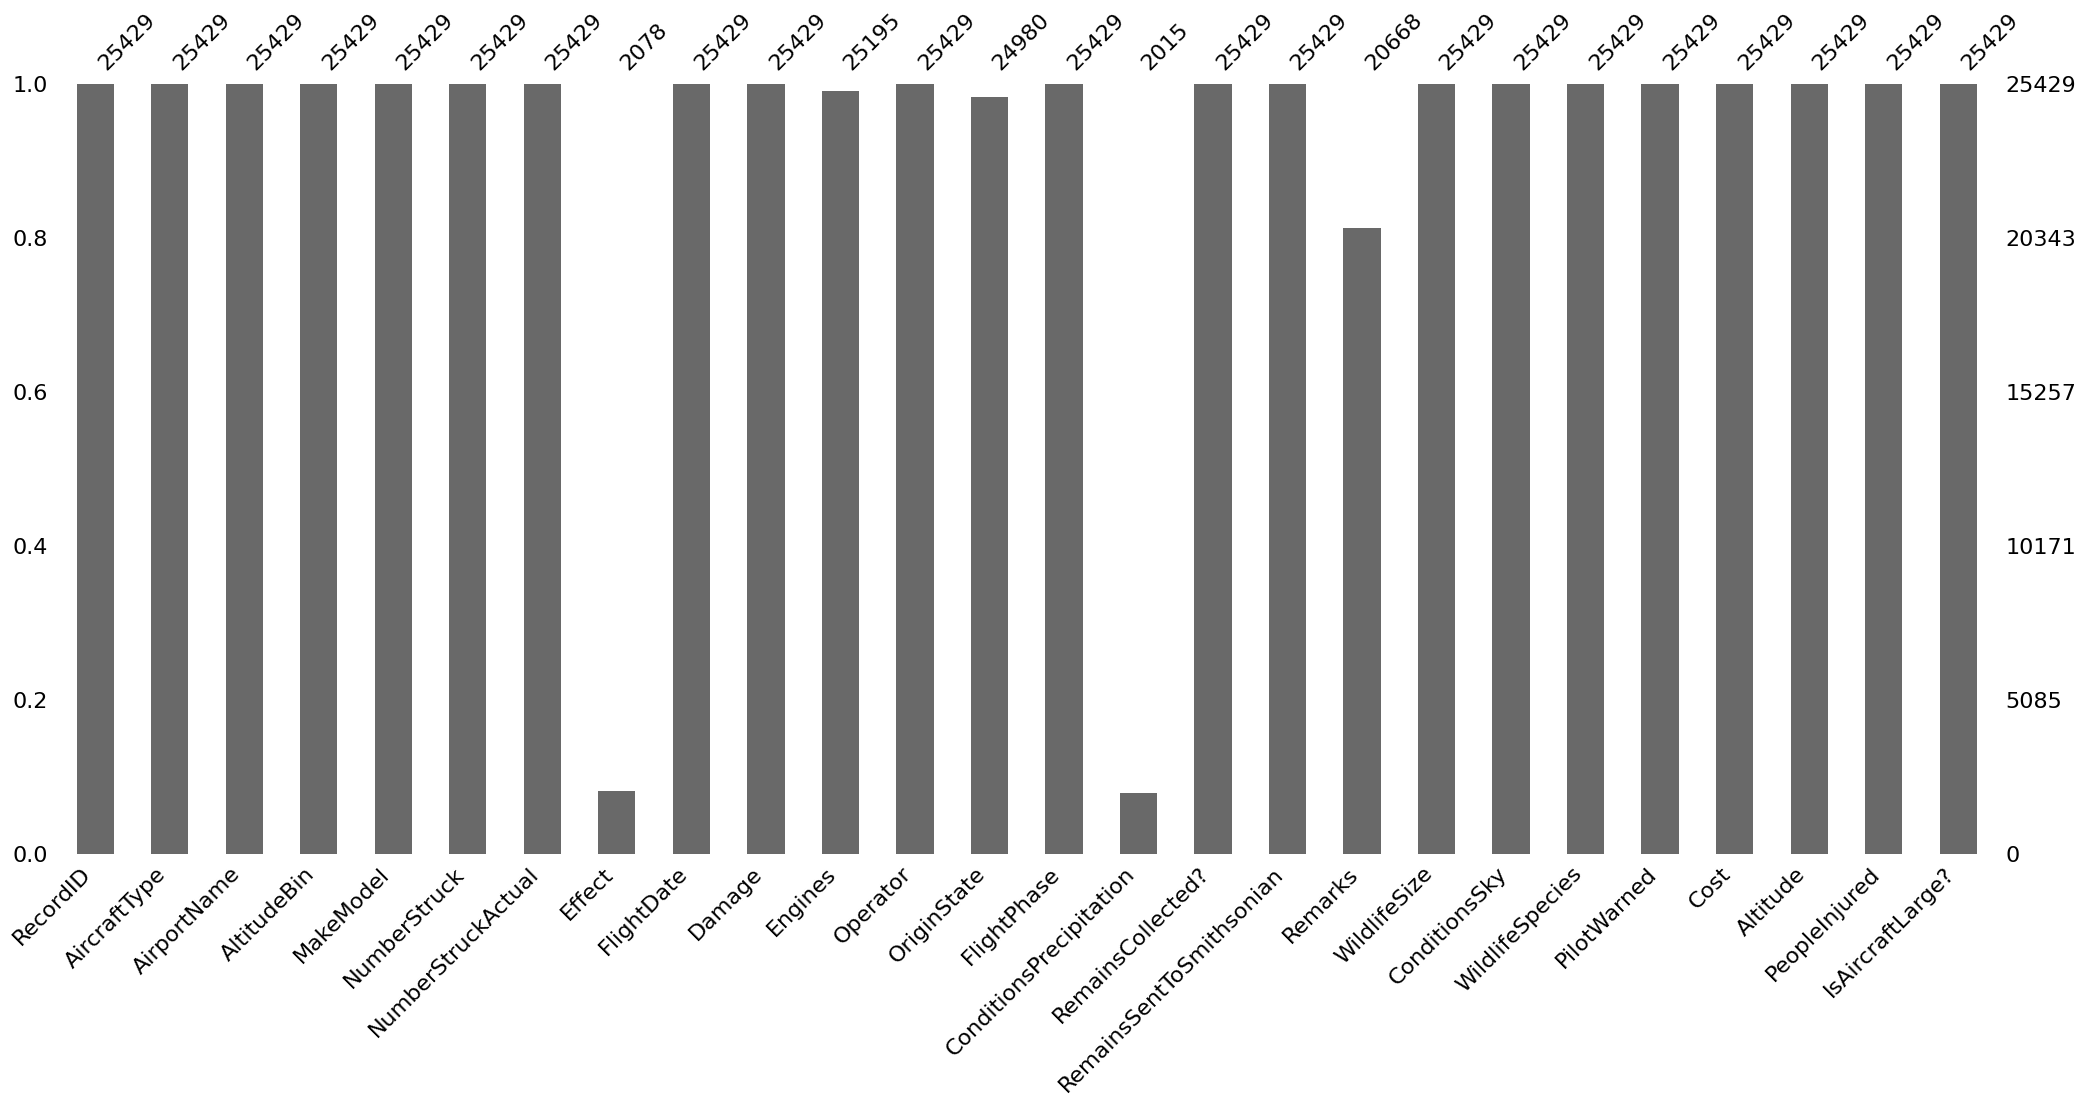

In [5]:
msno.bar(df_raw)

In [6]:
null_counts = df_raw.isnull().sum()  # Counts nulls in each column
null_counts = null_counts[null_counts > 0]  # Only show columns with at least one null
missing_percentages = ((null_counts / len(df_raw)) * 100) #percentage of nulls
#  displayed without truncation
pd.set_option('display.max_rows', None)
# Display the results
print(null_counts)
print((null_counts > 0).sum()) #number of columns with nulls
print(missing_percentages)


Effect                     23351
Engines                      234
OriginState                  449
ConditionsPrecipitation    23414
Remarks                     4761
dtype: int64
5
Effect                     91.828228
Engines                     0.920209
OriginState                 1.765701
ConditionsPrecipitation    92.075976
Remarks                    18.722718
dtype: float64


# Baseline Model Analysis

In [7]:
def create_baseline_model(df, target_column):
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    # Identify numeric and categorical columns
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    # Create preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    # Encode target if it's categorical
    if y.dtype == 'object':
        le = LabelEncoder()
        y = le.fit_transform(y)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.3, 
        random_state=42,
        stratify=y  # Maintain target distribution
    )

    # Create pipeline with preprocessor and decision tree
    baseline_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(
            random_state=42, 
            max_depth=5,  # Prevents overfitting
            criterion='gini'
        ))
    ])

    # Fit the model
    baseline_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = baseline_pipeline.predict(X_test)
    
    return {
        'model': baseline_pipeline,
        'y_true': y_test,
        'y_pred': y_pred
    }

# Function to print model results
def print_model_results(model_results, model_name='Baseline Model'):
    """
    Print model performance using classification_report
    """
    print(f"{model_name} Performance:")
    print(classification_report(
        model_results['y_true'], 
        model_results['y_pred']
    ))
    print("\nConfusion Matrix:")
    print(confusion_matrix(model_results['y_true'], model_results['y_pred']))

# Main execution
try:
    # Replace with your actual dataframe and target column name
    baseline_results = create_baseline_model(df_raw, 'Damage')
    print_model_results(baseline_results)

except Exception as e:
    print(f"An error occurred: {e}")

Baseline Model Performance:
              precision    recall  f1-score   support

           0       0.82      0.35      0.49       736
           1       0.93      0.99      0.96      6893

    accuracy                           0.93      7629
   macro avg       0.88      0.67      0.73      7629
weighted avg       0.92      0.93      0.92      7629


Confusion Matrix:
[[ 260  476]
 [  56 6837]]


# Data Preprocessing    

## Data Cleaning

### Duplicate Data Handling

In [8]:
df_raw.duplicated().sum()

0

there were no duplicates


## Data quality handling

dropping id column (all unique, no predictive value), aircraft (1 unique value, zero variance), remarks (natural language, will give us high dimensionality and potential noise and requires text processing (tokenization and vectorization))

In [9]:
df_raw['AircraftType'].nunique()

1

In [10]:
df_cleaned= df_raw.copy()
df_cleaned= df_cleaned.drop(columns=['RecordID','AircraftType','Remarks'])


the feature 'engine' is ordinal and has numeric values however some records have the value 'c'. we will remove the 'c' records and convert the values to numeric

In [11]:
df_cleaned['Engines'].unique()

array(['2', '3', '4', nan, '1', 'C'], dtype=object)

In [12]:
sum(df_cleaned['Engines'] == 'C')

1

only one record has the value 'c' so we will remove it

In [13]:
 df_cleaned = df_cleaned[df_cleaned['Engines'] != 'C']

# Convert to numeric
df_cleaned['Engines'] = pd.to_numeric(df_cleaned['Engines'], errors='coerce')
    
    

In [14]:
df_cleaned['Engines'].unique()

array([ 2.,  3.,  4., nan,  1.])

Converting PilotWarned and IsAircraftLarge to boolean as they are of object type with 2 unique values (yes or no)

In [15]:
print(df_cleaned['PilotWarned'].unique())
print(df_cleaned['IsAircraftLarge?'].unique())


['N' 'Y']
['Yes' 'No']


In [16]:
# Or alternatively, you can convert directly to integers (0/1)
df_cleaned['PilotWarned'] = df_cleaned['PilotWarned'].map({'Y': 1, 'N': 0})
df_cleaned['IsAircraftLarge?'] = df_cleaned['IsAircraftLarge?'].map({'Yes': 1, 'No': 0})

print(df_cleaned['PilotWarned'].dtype)
print(df_cleaned['IsAircraftLarge?'].dtype)

    

int64
int64


convert the flightdate to datetime format

In [17]:
# Convert to datetime
df_cleaned['FlightDate'] = pd.to_datetime(df_cleaned['FlightDate'])

# Extract basic time components
df_cleaned['Year'] = df_cleaned['FlightDate'].dt.year
df_cleaned['Month'] = df_cleaned['FlightDate'].dt.month
df_cleaned['Day'] = df_cleaned['FlightDate'].dt.day
df_cleaned['DayOfWeek'] = df_cleaned['FlightDate'].dt.dayofweek  # 0=Monday, 6=Sunday
df_cleaned['Quarter'] = df_cleaned['FlightDate'].dt.quarter

df_cleaned = df_cleaned.drop('FlightDate', axis=1)


C:\Users\96653\AppData\Local\Temp\ipykernel_8984\1959578433.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['FlightDate'] = pd.to_datetime(df_cleaned['FlightDate'])


Converting cost to numeric

In [18]:
# Convert to float, replacing empty strings with NaN
df_cleaned['Cost'] = pd.to_numeric(df_cleaned['Cost'], errors='coerce')

## Missing Data handling 

The column 'Effect' has more than 90% missing values (91.83%). The unique values are 'Engine Shut Down', 'Precautionary Landing', 'Other' and 'Aborted Take-off'. Let's see if the missing values correlate with the target variable Damage.

In [19]:

#  fill null values in Effect with 'Unknown'
df_plot = df_raw.copy()
df_plot['Effect'] = df_plot['Effect'].fillna('Unknown')

# Additional analysis
print(df_plot.groupby('Effect')['Damage'].describe())



                       count unique            top   freq
Effect                                                   
Aborted Take-off         479      2      No damage    351
Engine Shut Down          88      2  Caused damage     78
Other                    390      2      No damage    227
Precautionary Landing   1121      2      No damage    579
Unknown                23351      2      No damage  21808


there is a strong correlation of cases with unknown effect having no damage, this suggests that the missing values have a meaning as the effect was likely not recorded due to no significant impact. this preserves information and maintains dataset size.

 the missing values in effect might not be random and correlate with other features (e.g., WildlifeSize, FlightPhase)
 

In [20]:
# Calculate the proportion of "No damage" for each Effect category
effect_damage_dist = pd.crosstab(df_raw['Effect'], df_raw['Damage'], normalize='index') * 100
print("Percentage distribution of Damage for each Effect category:")
print(effect_damage_dist)


# Calculate mutual information between Effect and Damage
mi_score = mutual_info_score(df_raw['Effect'].fillna('Unknown'), df_raw['Damage'])
print(f"\nMutual Information Score between Effect and Damage: {mi_score:.4f}")

# Look at other relevant features for rows where Effect is Unknown
print("\nAnalyzing other features for Unknown Effect cases:")
relevant_features = ['WildlifeSize', 'FlightPhase', 'AltitudeBin']
for feature in relevant_features:
    print(f"\nDistribution of {feature} for Unknown Effect:")
    print(df_raw[df_raw['Effect'].isna()][feature].value_counts(normalize=True).head())

Percentage distribution of Damage for each Effect category:
Damage                 Caused damage  No damage
Effect                                         
Aborted Take-off           26.722338  73.277662
Engine Shut Down           88.636364  11.363636
Other                      41.794872  58.205128
Precautionary Landing      48.349688  51.650312

Mutual Information Score between Effect and Damage: 0.0407

Analyzing other features for Unknown Effect cases:

Distribution of WildlifeSize for Unknown Effect:
WildlifeSize
Small     0.707165
Medium    0.225986
Large     0.066849
Name: proportion, dtype: float64

Distribution of FlightPhase for Unknown Effect:
FlightPhase
Approach        0.429532
Landing Roll    0.210997
Take-off run    0.169115
Climb           0.156010
Descent         0.031433
Name: proportion, dtype: float64

Distribution of AltitudeBin for Unknown Effect:
AltitudeBin
(-1, 0]         0.383024
(1000, 2000]    0.070532
(50, 100]       0.062695
(600, 1000]     0.059740
(30, 50

adding a binary flag preserves information about missingness as a seperate feature.

adding a detailed category adds a more domain-informed category to capture more nuanced relationships. 

however, do we need both? the binary flag seems kind of redundant. lets let the numbers talk.

In [21]:
# Define the categorization function
def categorize_unknown_effect(row):
    if pd.isna(row['Effect']):
        return 'Unknown_Low_Impact' if row['WildlifeSize'] == 'Small' and row['FlightPhase'] in ['Approach', 'Landing Roll'] else 'Unknown_Other'
    return row['Effect']

# Prepare data function
def prepare_data(df, include_flag=True):
    # Create a copy of the dataframe
    df_copy = df.copy()
    
    # Add detailed categories and optional binary flag
    df_copy['Effect_Detailed'] = df_copy.apply(categorize_unknown_effect, axis=1)
    if include_flag:
        df_copy['Effect_Missing_Flag'] = df_copy['Effect'].isna().astype(int)
    
    # Get all features except the target variable 'Damage'
    features = [col for col in df_copy.columns if col != 'Damage']
    
    # Handle missing values
    # For numeric columns
    numeric_columns = df_copy[features].select_dtypes(include=['int64', 'float64']).columns
    df_copy[numeric_columns] = df_copy[numeric_columns].fillna(df_copy[numeric_columns].mean())
    
    # For categorical columns
    categorical_columns = df_copy[features].select_dtypes(include=['object']).columns
    df_copy[categorical_columns] = df_copy[categorical_columns].fillna('Unknown')
    
    # Create new dataframes for encoded features and target
    X = df_copy[features].copy()
    y = df_copy['Damage'].copy()
    
    # Encode features and target
    for column in X.columns:
        X[column] = LabelEncoder().fit_transform(X[column])
    y = LabelEncoder().fit_transform(y)
    
    return X, y

# Train and evaluate the model
def train_and_evaluate(X, y, model_name):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    dt = DecisionTreeClassifier(random_state=42, max_depth=5)
    dt.fit(X_train, y_train)
    
    # Evaluate model
    y_pred = dt.predict(X_test)
    y_pred_proba = dt.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Print metrics
    print(f"\nResults for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {auc:.4f}")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': dt.feature_importances_
    })
    print("\nFeature Importance:")
    print(feature_importance.sort_values('importance', ascending=False))
    
    return dt

# Main execution
def main():
    # Prepare and evaluate models
    for include_flag in [True, False]:
        model_name = "Model with Flag" if include_flag else "Model without Flag"
        X, y = prepare_data(df_raw, include_flag=include_flag)
        train_and_evaluate(X, y, model_name)

main()


Results for Model with Flag:

              precision    recall  f1-score   support

           0       0.68      0.39      0.50       480
           1       0.94      0.98      0.96      4606

    accuracy                           0.92      5086
   macro avg       0.81      0.69      0.73      5086
weighted avg       0.91      0.92      0.92      5086

ROC-AUC Score: 0.8633

Feature Importance:
                     feature  importance
21                      Cost    0.488175
17              WildlifeSize    0.245706
26       Effect_Missing_Flag    0.112766
19           WildlifeSpecies    0.027039
15  RemainsSentToSmithsonian    0.025810
22                  Altitude    0.022168
4                  MakeModel    0.020760
7                     Effect    0.016654
16                   Remarks    0.014537
25           Effect_Detailed    0.006527
8                 FlightDate    0.006452
0                   RecordID    0.005259
2                AirportName    0.005038
9                    Engi

Model Performance Comparison:
Baseline Model: Accuracy = 0.9304, F1 = 0.9212
Model with Flag: Accuracy ≈ 0.92, F1 ≈ 0.92
Model without Flag: Accuracy ≈ 0.92, F1 ≈ 0.92
Key Observations:
The baseline model slightly outperforms both new models
Both new models perform almost identically (with/without flag)

just drop the effect column

In [22]:
df_cleaned= df_cleaned.drop('Effect', axis=1)

ConditionsPrecipitation

In [23]:

#  fill null values in Effect with 'Unknown'
df_plot = df_raw.copy()
df_plot['ConditionsPrecipitation'] = df_plot['ConditionsPrecipitation'].fillna('Unknown')

# Additional analysis
print(df_plot.groupby('ConditionsPrecipitation')['Damage'].describe())



                         count unique        top   freq
ConditionsPrecipitation                                
Fog                        475      2  No damage    419
Fog, Rain                   85      2  No damage     75
Fog, Rain, Snow              3      1  No damage      3
Fog, Snow                    4      1  No damage      4
Rain                      1353      2  No damage   1197
Rain, Snow                   6      2  No damage      5
Snow                        89      2  No damage     78
Unknown                  23414      2  No damage  21194


In [24]:
# Calculate the proportion of "No damage" for each ConditionsPrecipitation_damage_dist category
ConditionsPrecipitation_damage_dist = pd.crosstab(df_raw['ConditionsPrecipitation'], df_raw['Damage'], normalize='index') * 100
print("Percentage distribution of Damage for each ConditionsPrecipitation category:")
print(ConditionsPrecipitation_damage_dist)


# Calculate mutual information between ConditionsPrecipitation_damage_dist and Damage
mi_score = mutual_info_score(df_raw['ConditionsPrecipitation'].fillna('Unknown'), df_raw['Damage'])
print(f"\nMutual Information Score between ConditionsPrecipitation_damage_dist and Damage: {mi_score:.4f}")

# Look at other relevant features for rows where ConditionsPrecipitation_damage_dist is Unknown
print("\nAnalyzing other features for Unknown ConditionsPrecipitation_damage_dist cases:")
relevant_features = ['WildlifeSize', 'FlightPhase', 'AltitudeBin']
for feature in relevant_features:
    print(f"\nDistribution of {feature} for Unknown ConditionsPrecipitation_damage_dist:")
    print(df_raw[df_raw['ConditionsPrecipitation'].isna()][feature].value_counts(normalize=True).head())

Percentage distribution of Damage for each ConditionsPrecipitation category:
Damage                   Caused damage   No damage
ConditionsPrecipitation                           
Fog                          11.789474   88.210526
Fog, Rain                    11.764706   88.235294
Fog, Rain, Snow               0.000000  100.000000
Fog, Snow                     0.000000  100.000000
Rain                         11.529933   88.470067
Rain, Snow                   16.666667   83.333333
Snow                         12.359551   87.640449

Mutual Information Score between ConditionsPrecipitation_damage_dist and Damage: 0.0002

Analyzing other features for Unknown ConditionsPrecipitation_damage_dist cases:

Distribution of WildlifeSize for Unknown ConditionsPrecipitation_damage_dist:
WildlifeSize
Small     0.690484
Medium    0.229478
Large     0.080038
Name: proportion, dtype: float64

Distribution of FlightPhase for Unknown ConditionsPrecipitation_damage_dist:
FlightPhase
Approach        0.4125

In [25]:

# Calculate mutual information between ConditionsPrecipitation_damage_dist and Damage
mi_score = mutual_info_score(df_raw['WildlifeSize'].fillna('Unknown'), df_raw['Damage'])
print(f"\nMutual Information Score between ConditionsPrecipitation_damage_dist and Damage: {mi_score:.4f}")


Mutual Information Score between ConditionsPrecipitation_damage_dist and Damage: 0.0573


just drop the ConditionsPrecipitation column, 92% missing

In [26]:
df_cleaned= df_cleaned.drop('ConditionsPrecipitation', axis=1)

Handling the engine nulls, only 0.92% missing

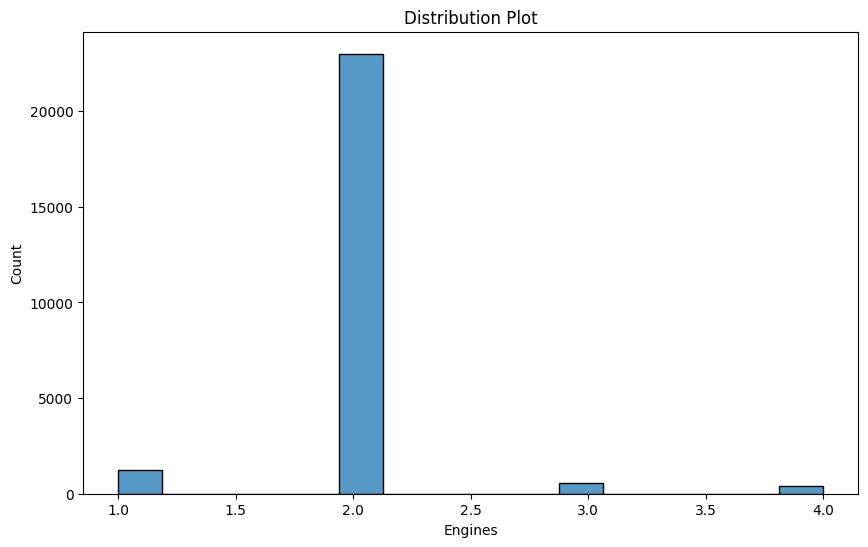

Skewness: 1.9501156583907504


In [27]:

plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['Engines'])
plt.title('Distribution Plot')
plt.show()

# Check skewness
skewness = df_cleaned['Engines'].skew()
print(f"Skewness: {skewness}")
# If skewness is close to 0 (typically between -0.5 and 0.5), use mean

since the skewness is above 0,5, we can use the median to fill the nulls

In [28]:
# If skewness is significant (> 0.5 or < -0.5)
if abs(df_cleaned['Engines'].skew()) > 0.5:
    df_cleaned['Engines'] = df_cleaned['Engines'].fillna(df_cleaned['Engines'].median())

Handling OriginState nulls, 1.7% missing

i could infer the origin state from the airport name, but sadly there are too many unique airport names (1109) so it isnt doable to map them

In [29]:
df_cleaned['AirportName'].nunique()

1109

In [30]:
unique_airports = df_cleaned['AirportName'].unique()
for airport in unique_airports:
    print(airport)

LAGUARDIA NY
DALLAS/FORT WORTH INTL ARPT
LAKEFRONT AIRPORT
SEATTLE-TACOMA INTL
NORFOLK INTL
GUAYAQUIL/S BOLIVAR
NEW CASTLE COUNTY
WASHINGTON DULLES INTL ARPT
ATLANTA INTL
ORLANDO SANFORD INTL AIRPORT
ONTARIO INTL ARPT
CHICAGO O'HARE INTL ARPT
GROTON-NEW LONDON AR
SPIRIT OF ST LOUIS
THEODORE FRANCIS GREEN STATE
KANSAS CITY INTL
LIHUE ARPT
PHOENIX SKY HARBOR
NASHVILLE INTL
JIM HAMILTON L B OWENS ARPT
SOUTHWEST FLORIDA INTL ARPT
ABERDEEN REGIONAL AR
NEWARK LIBERTY INTL ARPT
ASPEN-PITKIN CO/SARD
ROCHESTER INTL
MINNEAPOLIS-ST PAUL INTL
PUEBLO MEMORIAL ARPT
WESTCHESTER COUNTY ARPT
BIRMINGHAM-SHUTTLESWORTH INTL
TAHITI FAAA
ORLANDO INTL
MYRTLE BEACH INTL
LAFAYETTE REGIONAL (LA)
CLEVELAND-HOPKINS INTL ARPT
SAN FRANCISCO INTL ARPT
CENTRAL WISCONSIN ARPT
BARKSDALE AIR FORCE BASE ARPT
DETROIT METRO WAYNE COUNTY ARPT
TOLEDO EXPRESS ARPT
METRO OAKLAND INTL
BEVERLY MUNICIPAL ARPT
TED STEVENS ANCHORAGE INTL
CHARLOTTE/DOUGLAS INTL ARPT
CINCINNATI/NORTHERN KENTUCKY INTL ARPT
GREATER PEORIA REGIONAL ARPT

however, i have another trick up my sleeve, i will use an external datasource that has all airportnames and their states.

In [31]:
airport_db = pd.read_csv("us-airports.csv")  # Contains 'AirportName' and 'State' columns
airport_db.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,3632,KLAX,large_airport,Los Angeles International Airport,33.942501,-118.407997,125.0,NaN,United States,US,...,Los Angeles,1,KLAX,LAX,LAX,https://www.flylax.com/,https://en.wikipedia.org/wiki/Los_Angeles_Inte...,Tom Bradley,1335475,2024-04-02T16:36:13+00:00
1,3754,KORD,large_airport,Chicago O'Hare International Airport,41.978600,-87.904800,680.0,NaN,United States,US,...,Chicago,1,KORD,ORD,ORD,https://www.flychicago.com/ohare/home/pages/de...,https://en.wikipedia.org/wiki/O'Hare_Internati...,"CHI, Orchard Place",1503175,2024-03-09T23:28:49+00:00
2,3622,KJFK,large_airport,John F Kennedy International Airport,40.639447,-73.779317,13.0,NaN,United States,US,...,New York,1,KJFK,JFK,JFK,https://www.jfkairport.com/,https://en.wikipedia.org/wiki/John_F._Kennedy_...,"Manhattan, New York City, NYC, Idlewild, IDL, ...",1052075,2022-10-18T18:49:55+00:00
3,3384,KATL,large_airport,Hartsfield Jackson Atlanta International Airport,33.636700,-84.428101,1026.0,NaN,United States,US,...,Atlanta,1,KATL,ATL,ATL,http://www.atlanta-airport.com/,https://en.wikipedia.org/wiki/Hartsfield–Jacks...,NaN,2002475,2024-04-02T16:26:01+00:00
4,3878,KSFO,large_airport,San Francisco International Airport,37.619806,-122.374821,13.0,NaN,United States,US,...,San Francisco,1,KSFO,SFO,SFO,http://www.flysfo.com/,https://en.wikipedia.org/wiki/San_Francisco_In...,"QSF, QBA",1112475,2024-04-02T16:43:50+00:00


In [32]:
# First, create a dictionary mapping airport names to their states from the airport database
airport_state_dict = dict(zip(airport_db['name'], airport_db['region_name']))

# Only fill missing OriginState values using the mapping
mask = df_cleaned['OriginState'].isnull()
df_cleaned.loc[mask, 'OriginState'] = df_cleaned.loc[mask, 'AirportName'].map(airport_state_dict)

In [33]:
print(df_cleaned['OriginState'].isnull().sum())


449


seems like nothing changed, lets check if the missing origin state's airport names exist in the airport database

In [34]:
missing_state_airports = df_cleaned[df_cleaned['OriginState'].isnull()]['AirportName'].unique()

for airport in missing_state_airports[:10]:
    print(f"\nAirport '{airport}' exists in airport database: {airport in airport_db['name'].values}")


Airport 'GUAYAQUIL/S BOLIVAR' exists in airport database: False

Airport 'TAHITI FAAA' exists in airport database: False

Airport 'CAPITAL (BEIJING)' exists in airport database: False

Airport 'SUVA FIJI' exists in airport database: False

Airport 'TOCUMEN INTL' exists in airport database: False

Airport 'SANTO DOMINGO/LAS AM' exists in airport database: False

Airport 'PUERTO VALLARTA' exists in airport database: False

Airport 'MINISTRO PISTARINI' exists in airport database: False

Airport 'CHARLES DE GAULLE' exists in airport database: False

Airport 'AQUASCALIENTES' exists in airport database: False


looks like no missing origin state's airport names exist in the airport database. i will use KNN imputation as it maintains the pattern of the data.

In [35]:


def knn_impute_state(df):
    # Create a copy of the dataframe
    df = df.copy()
    
    # First, let's see what features we can use for prediction
    features_for_prediction = [
        'Operator', 
        'FlightPhase',
        'WildlifeSize',
        'WildlifeSpecies',
        'AirportName'
    ]
    
    # Initialize dictionary for label encoders
    le_dict = {}
    
    # Create temporary columns with encoded values
    for col in features_for_prediction:
        if col in df.columns:
            le_dict[col] = LabelEncoder()
            df[f'{col}_encoded'] = le_dict[col].fit_transform(df[col].fillna('missing'))
    
    # Create label encoder for OriginState
    le_state = LabelEncoder()
    # Fit on non-null values
    non_null_states = df['OriginState'].dropna().values
    le_state.fit(non_null_states)
    
    # Transform non-null values and store in new column
    df['OriginState_encoded'] = np.nan
    mask = df['OriginState'].notna()
    df.loc[mask, 'OriginState_encoded'] = le_state.transform(df.loc[mask, 'OriginState'])
    
    # Prepare features matrix for KNN imputation
    features_for_imputation = [f'{col}_encoded' for col in features_for_prediction if col in df.columns]
    features_for_imputation.append('OriginState_encoded')
    
    # Initialize KNN imputer
    imputer = KNNImputer(n_neighbors=5, weights='uniform')
    
    # Perform imputation
    imputed_data = imputer.fit_transform(df[features_for_imputation])
    
    # Convert imputed data back to dataframe with the same index as original
    imputed_df = pd.DataFrame(imputed_data, columns=features_for_imputation, index=df.index)
    
    # Round the imputed values to nearest integer
    imputed_state_values = imputed_df['OriginState_encoded'].round().astype(int)
    
    # Get the indices where OriginState is null
    null_indices = df['OriginState'].isna()
    
    # Convert encoded values back to original state names
    df.loc[null_indices, 'OriginState'] = le_state.inverse_transform(imputed_state_values[null_indices])
    
    # Drop the temporary encoded columns
    encoded_cols = [col for col in df.columns if col.endswith('_encoded')]
    df = df.drop(columns=encoded_cols)
    
    return df

# Use the function
df_imputed = knn_impute_state(df_cleaned)

# Print some statistics to verify the imputation
print("Number of missing values in OriginState before imputation:", df_cleaned['OriginState'].isna().sum())
print("Number of missing values in OriginState after imputation:", df_imputed['OriginState'].isna().sum())
print("\nValue counts after imputation:")
print(df_imputed['OriginState'].value_counts().head())

Number of missing values in OriginState before imputation: 449
Number of missing values in OriginState after imputation: 0

Value counts after imputation:
OriginState
California    2525
Texas         2455
Florida       2052
New York      1339
Illinois      1009
Name: count, dtype: int64


In [36]:
null_counts = df_imputed.isnull().sum()  # Counts nulls in each column
null_counts = null_counts[null_counts > 0]  # Only show columns with at least one null
missing_percentages = ((null_counts / len(df_imputed)) * 100) #percentage of nulls
#  displayed without truncation
pd.set_option('display.max_rows', None)
# Display the results
print(null_counts)
print((null_counts > 0).sum()) #number of columns with nulls
print(missing_percentages)


Cost    826
dtype: int64
1
Cost    3.248388
dtype: float64


handling cost empty values using a knn imputer

In [37]:
def impute_cost(df):
    # Create a copy of the dataframe
    df_copy = df.copy()
    
    # Select numerical features for imputation
    # Assuming you have numerical features that might correlate with cost
    numerical_features = df_copy.select_dtypes(include=['float64', 'int64']).columns
    
    # Initialize the KNN imputer
    imputer = KNNImputer(n_neighbors=5, weights='uniform')
    
    # Prepare the data for imputation
    # Only use numerical features for the imputation
    data_for_imputation = df_copy[numerical_features]
    
    # Perform the imputation
    imputed_data = imputer.fit_transform(data_for_imputation)
    
    # Create a DataFrame with the imputed data
    imputed_df = pd.DataFrame(imputed_data, columns=numerical_features, index=df_copy.index)
    
    # Update only the 'cost' column in the original dataframe
    df_copy['Cost'] = imputed_df['Cost']
    
    return df_copy

df_imputed = impute_cost(df_imputed)

## Outlier Handling

#### Visualzing and Calculating Outliers

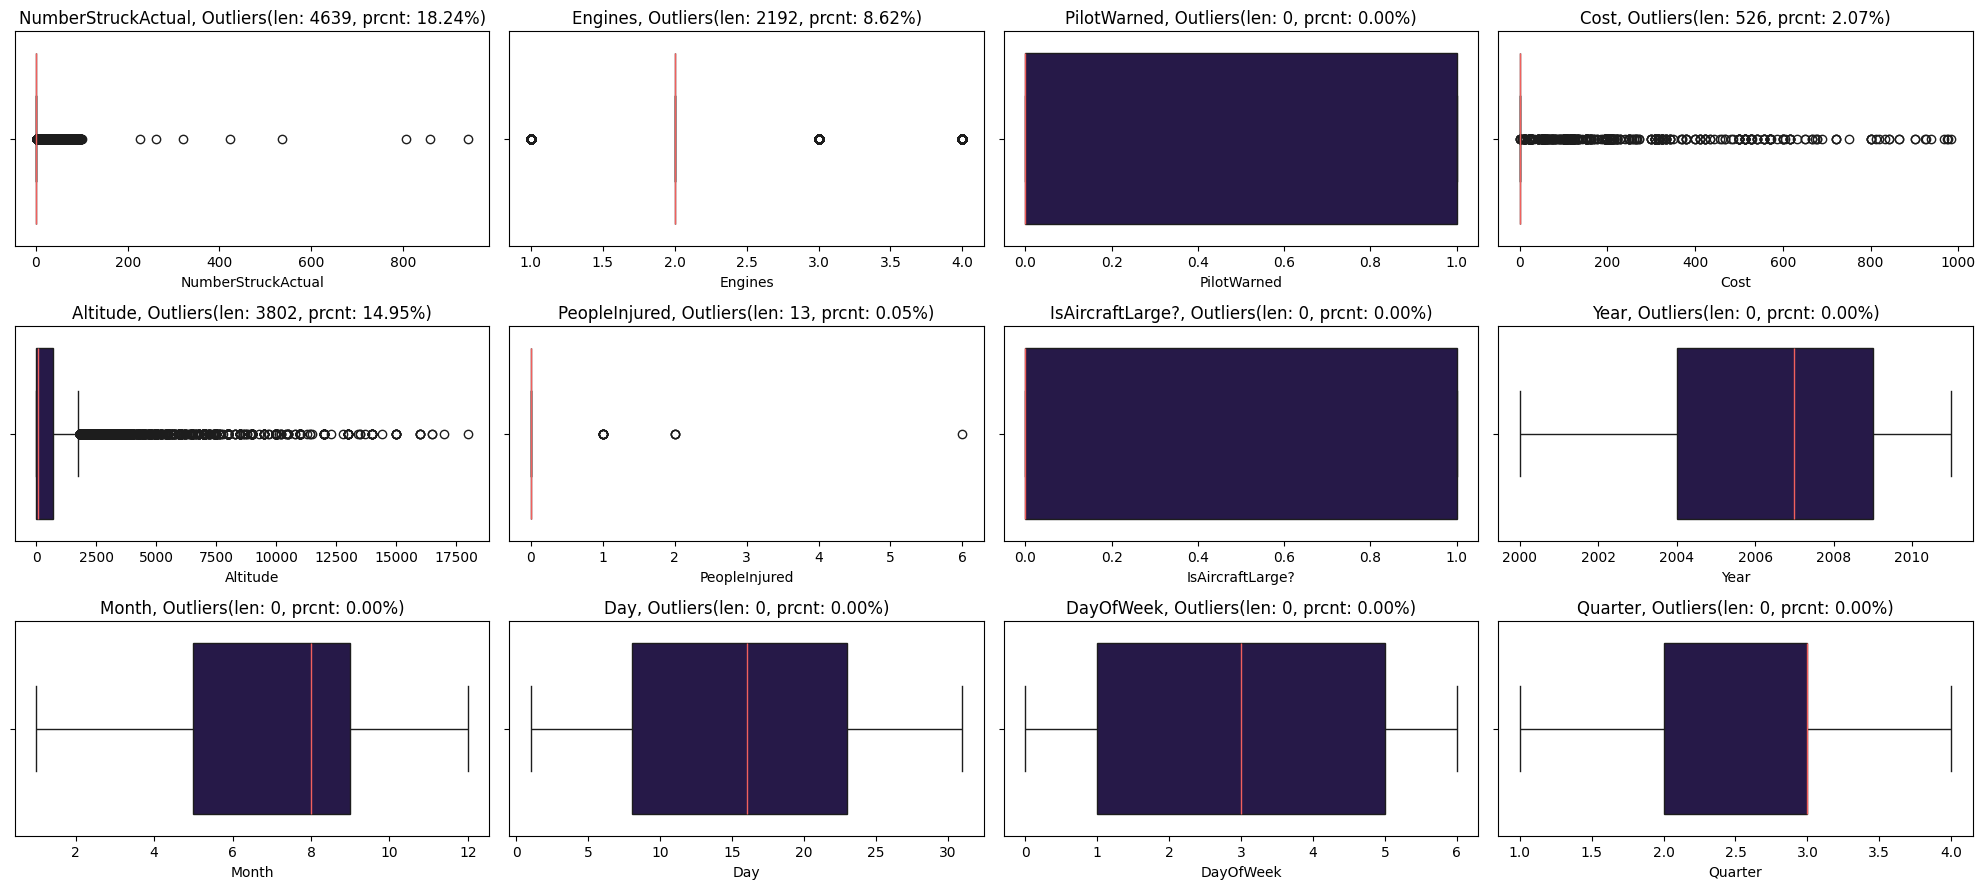

In [38]:
def calculateOutliersPercentage(column):
    Q1 = df_imputed[column].quantile(0.25)
    Q3 = df_imputed[column].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_imputed[(df_imputed[column] < lower_bound) | (df_imputed[column] > upper_bound)]
    return f'(len: {len(outliers)}, prcnt: {((len(outliers) / len(df_imputed)) * 100):.2f}%)'

num_columns = len(df_imputed.select_dtypes(include='number').columns)
rows = (num_columns + 1) // 4  
fig, axes = plt.subplots(rows, 4, figsize=(20, 3 * rows))

for i, column in enumerate(df_imputed.select_dtypes(include='number').columns):
    ax = axes[i // 4, i % 4]  
    sns.boxplot(x=df_imputed[column], 
                color=sns.color_palette("magma")[0], 
                medianprops=dict(color='#f1605d'),  
                ax=ax)  
    ax.set_title(f'{column}, Outliers{calculateOutliersPercentage(column)}')

plt.tight_layout()  
plt.show()

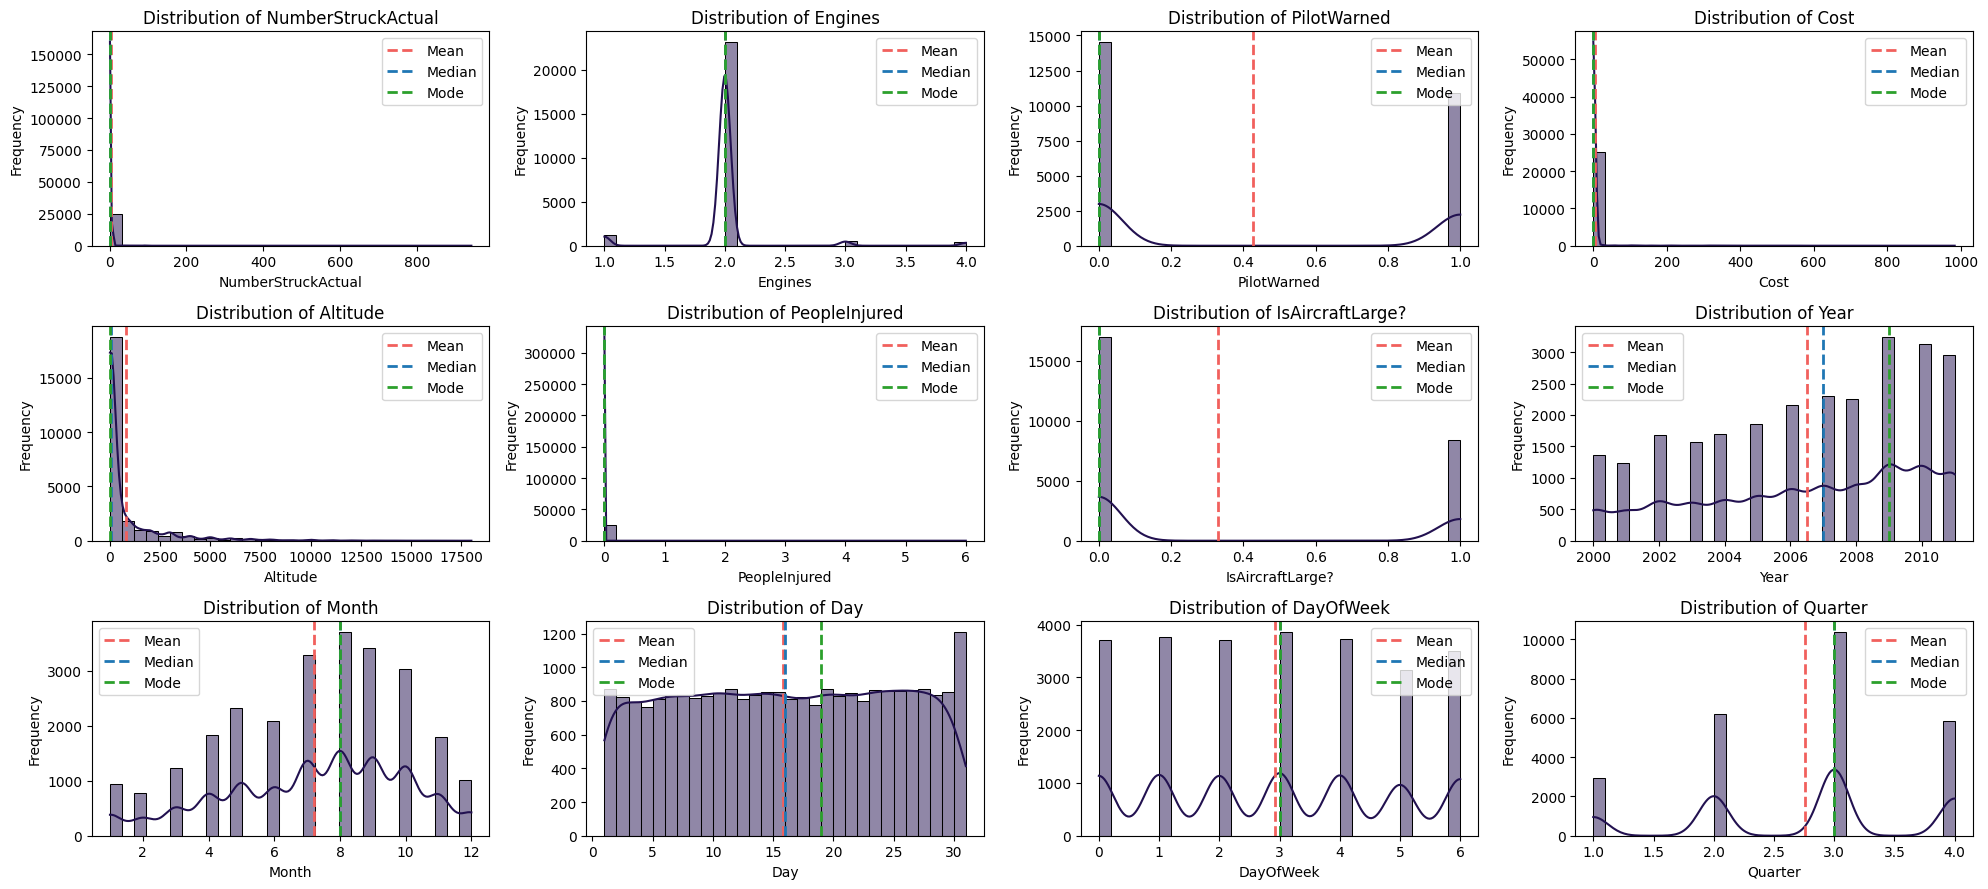

In [39]:
columns_to_analyze = df_imputed.select_dtypes(include='number').columns

num_columns = len(columns_to_analyze)
rows = (num_columns + 3) // 4  
fig, axes = plt.subplots(rows, 4, figsize=(20, 3 * rows))

for i, column in enumerate(columns_to_analyze):
    ax = axes[i // 4, i % 4]  
    sns.histplot(df_imputed[column], bins=30, kde=True, color=sns.color_palette("magma")[0], ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

    mean_value = df_imputed[column].mean()
    median_value = df_imputed[column].median()
    mode_value = df_imputed[column].mode()[0]

    ax.axvline(mean_value, color='#f1605d', linestyle='--', linewidth=2, label='Mean') 
    ax.axvline(median_value, color='#1f77b4', linestyle='--', linewidth=2, label='Median') 
    ax.axvline(mode_value, color='#2ca02c', linestyle='--', linewidth=2, label='Mode') 

    ax.legend() 

plt.tight_layout() 
plt.show()

Detecting and Handling Outliers with kmeans, dbscan, isolation forest and iqr


Analyzing with kmeans...

Replaced outliers in NumberStruckActual with median: 1.0


C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")



Replaced outliers in Altitude with median: 40.0

Replaced outliers in Cost with median: 0.0

Clipped outliers in Engines to range: [1.18, 2.76]

Clipped outliers in PeopleInjured to range: [0.00, 0.00]

Outlier Analysis using KMEANS
Method: kmeans
Total samples: 25428
Number of outliers: 1444
Percentage of outliers: 5.68%


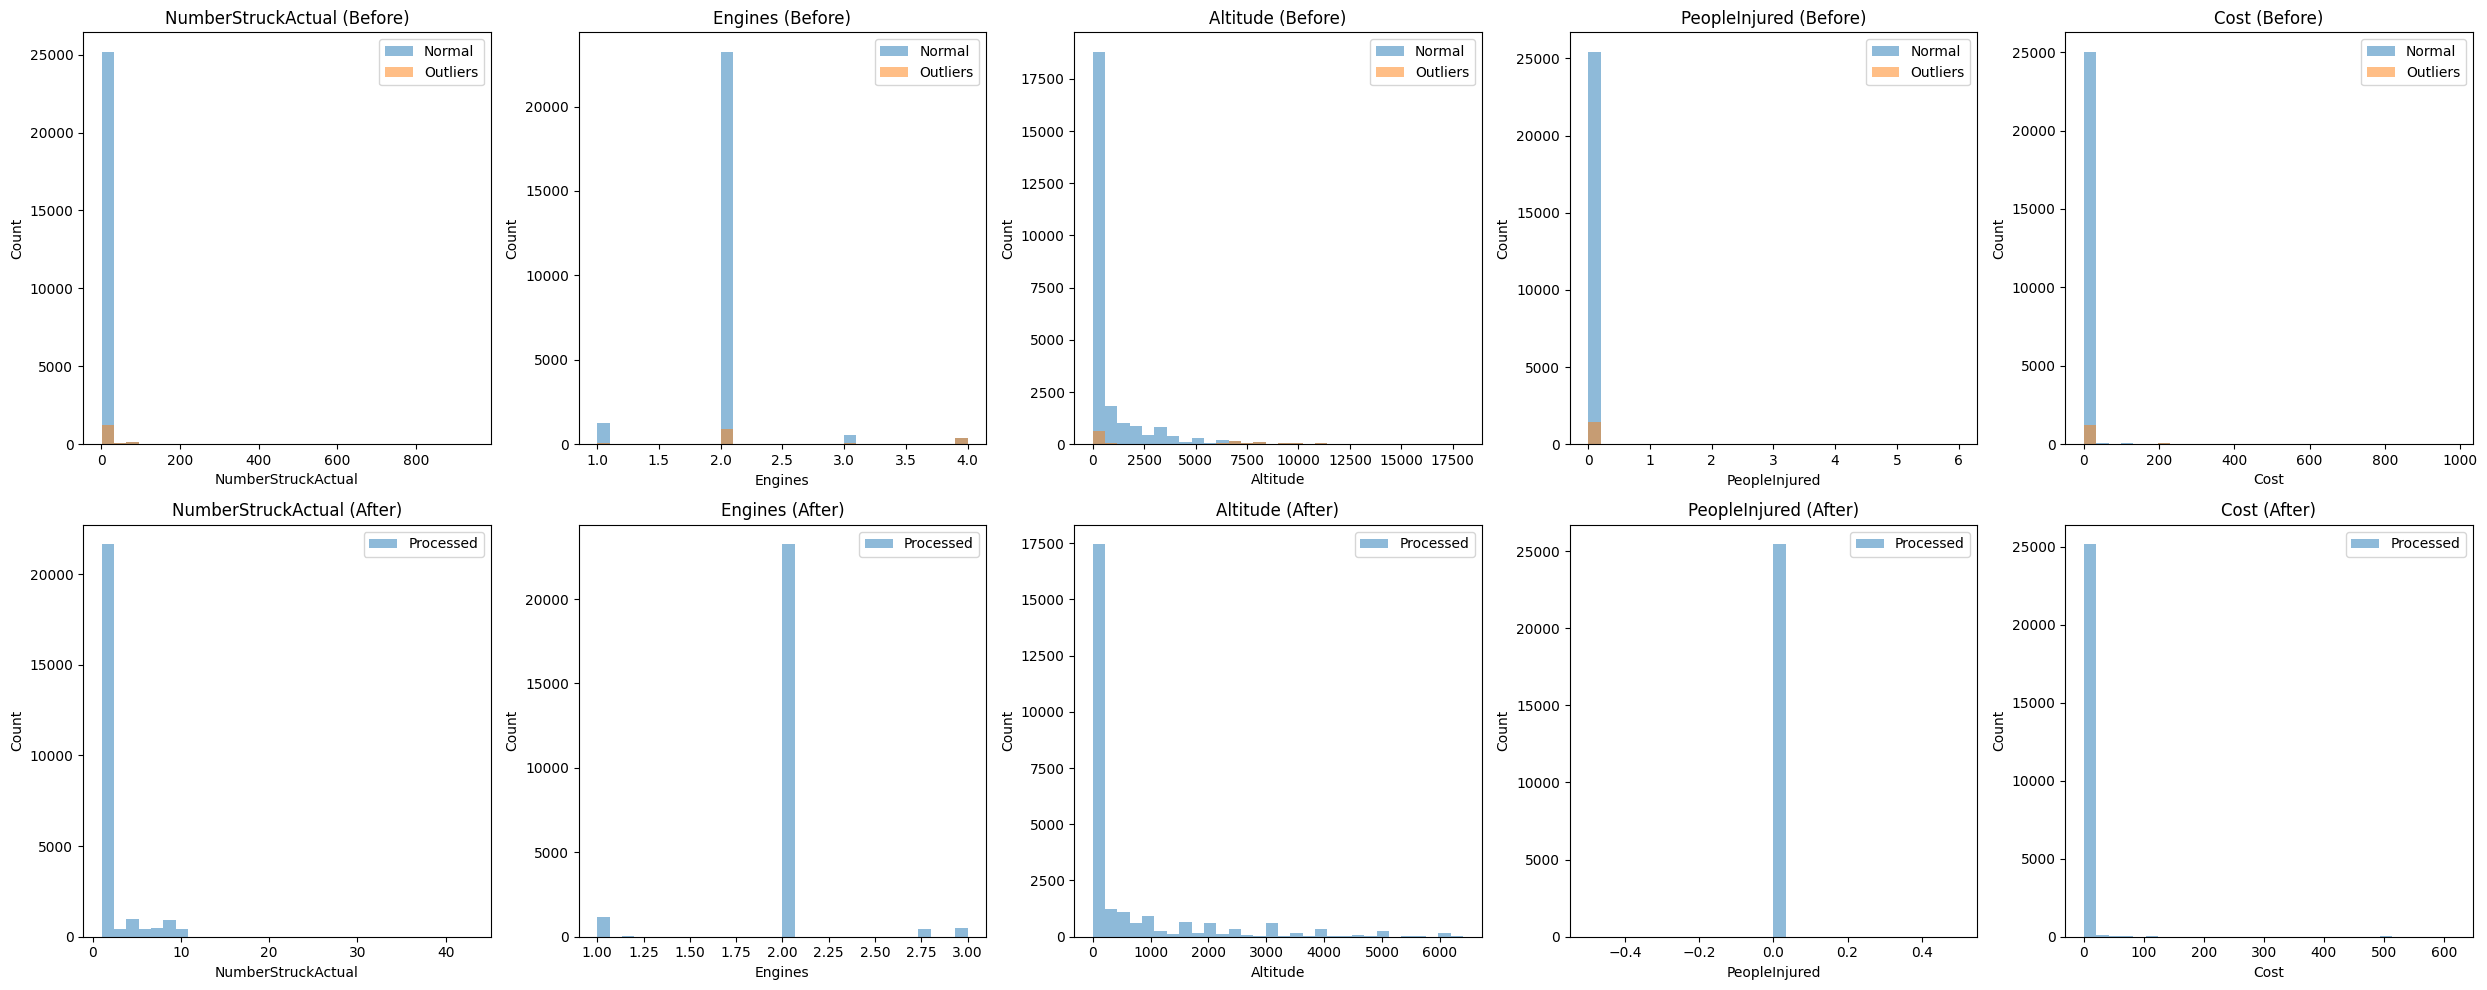


Detailed Statistics:

NumberStruckActual:
Before processing:
count    25428.000000
mean         2.699701
std         12.826052
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        942.000000
Name: NumberStruckActual, dtype: float64

After processing:
count    25428.000000
mean         1.908172
std          2.693698
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         43.000000
Name: NumberStruckActual, dtype: float64

Engines:
Before processing:
count    25428.000000
mean         2.003933
std          0.363277
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: Engines, dtype: float64

After processing:
count    25428.000000
mean         1.984950
std          0.278691
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Engines, dtype: float64

Altitude:
Before process

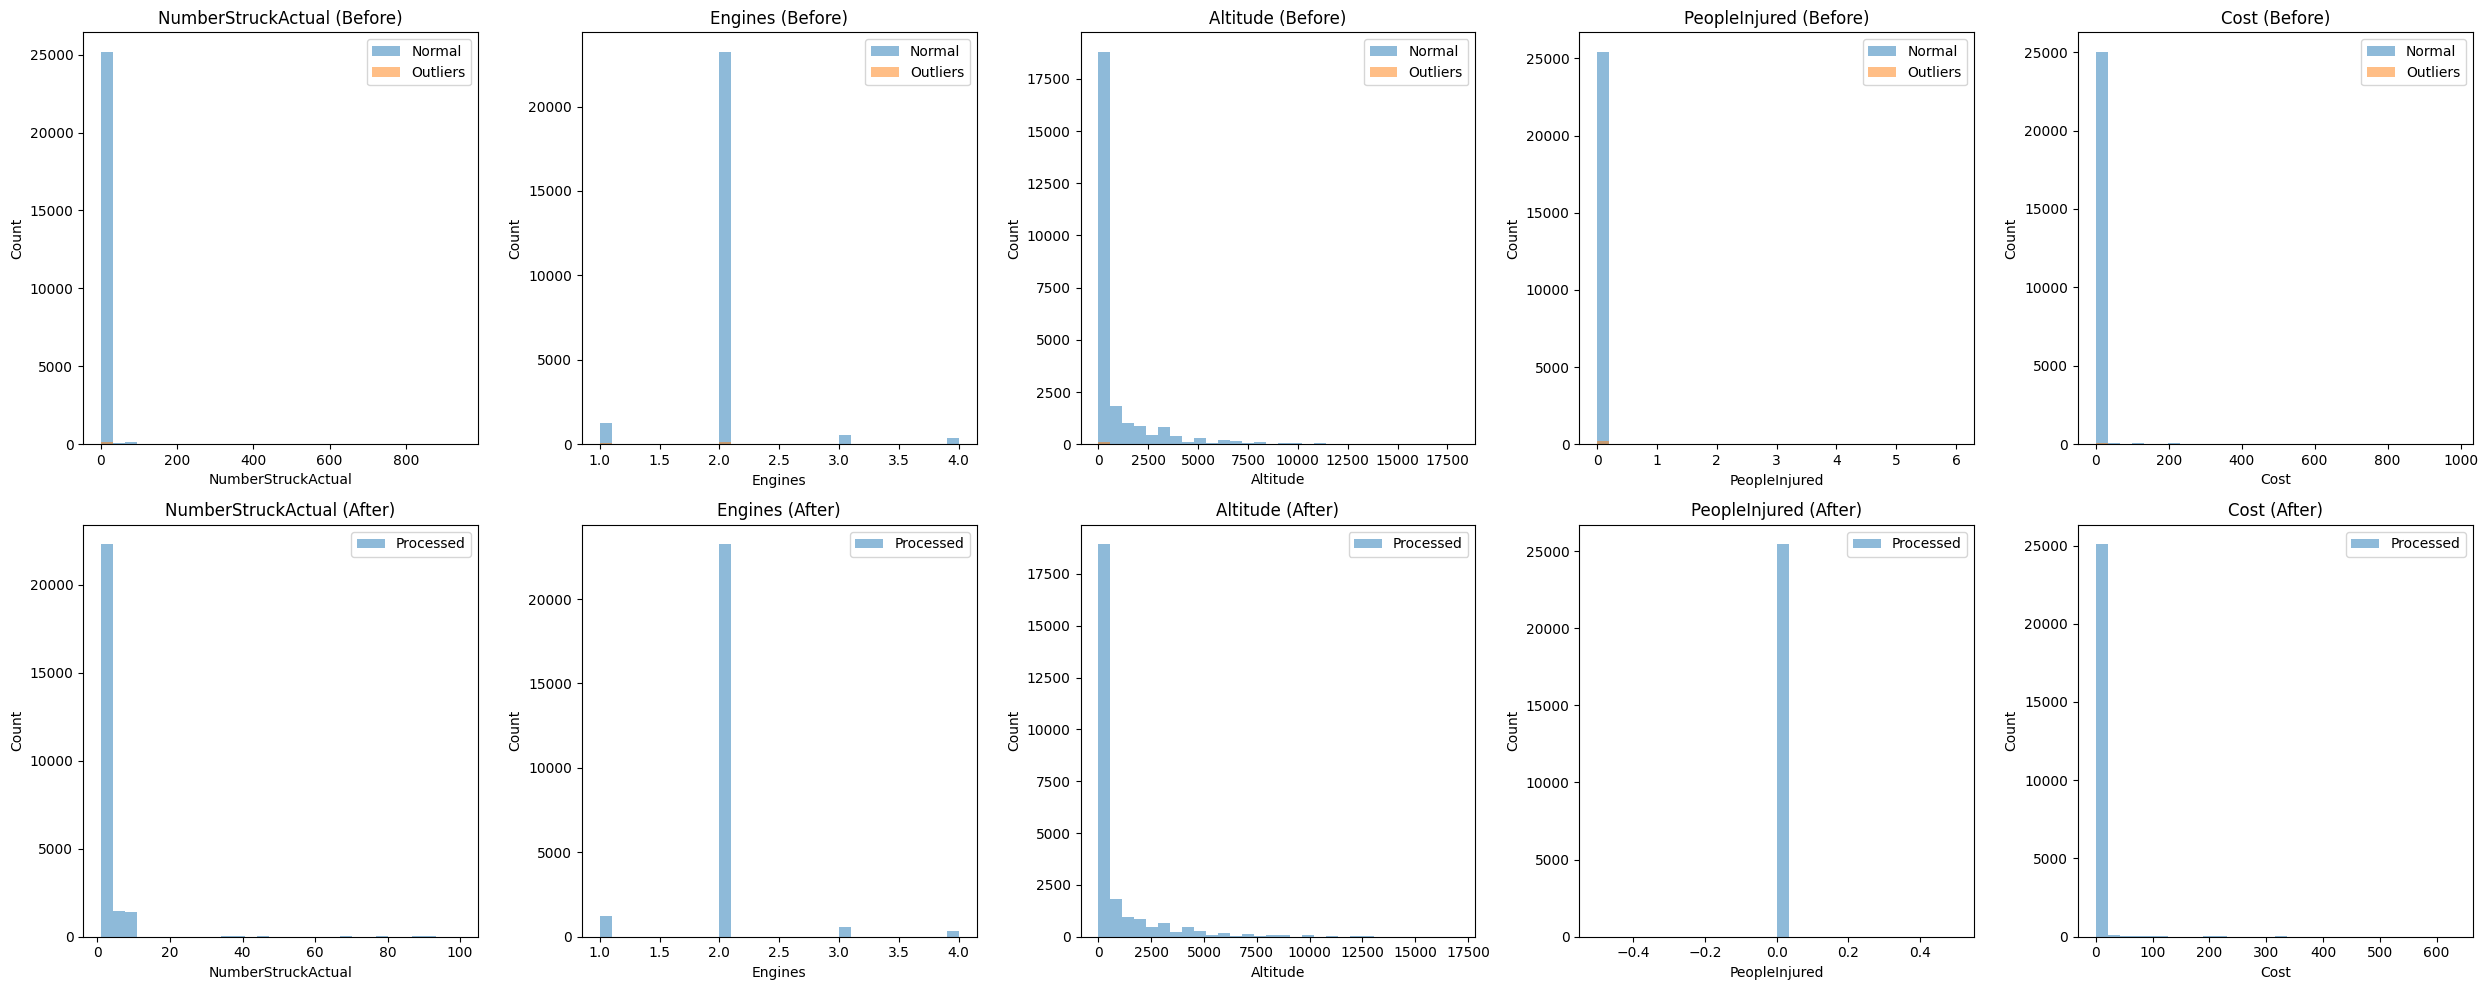


Detailed Statistics:

NumberStruckActual:
Before processing:
count    25428.000000
mean         2.699701
std         12.826052
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        942.000000
Name: NumberStruckActual, dtype: float64

After processing:
count    25428.000000
mean         2.425004
std          6.540849
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        100.000000
Name: NumberStruckActual, dtype: float64

Engines:
Before processing:
count    25428.000000
mean         2.003933
std          0.363277
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: Engines, dtype: float64

After processing:
count    25428.000000
mean         2.003202
std          0.360183
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: Engines, dtype: float64

Altitude:
Before process

C:\Users\96653\AppData\Local\Temp\ipykernel_8984\2985444533.py:76: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  processed_data.loc[outliers, col] = processed_data.loc[outliers, col].clip(lower_bound, upper_bound)


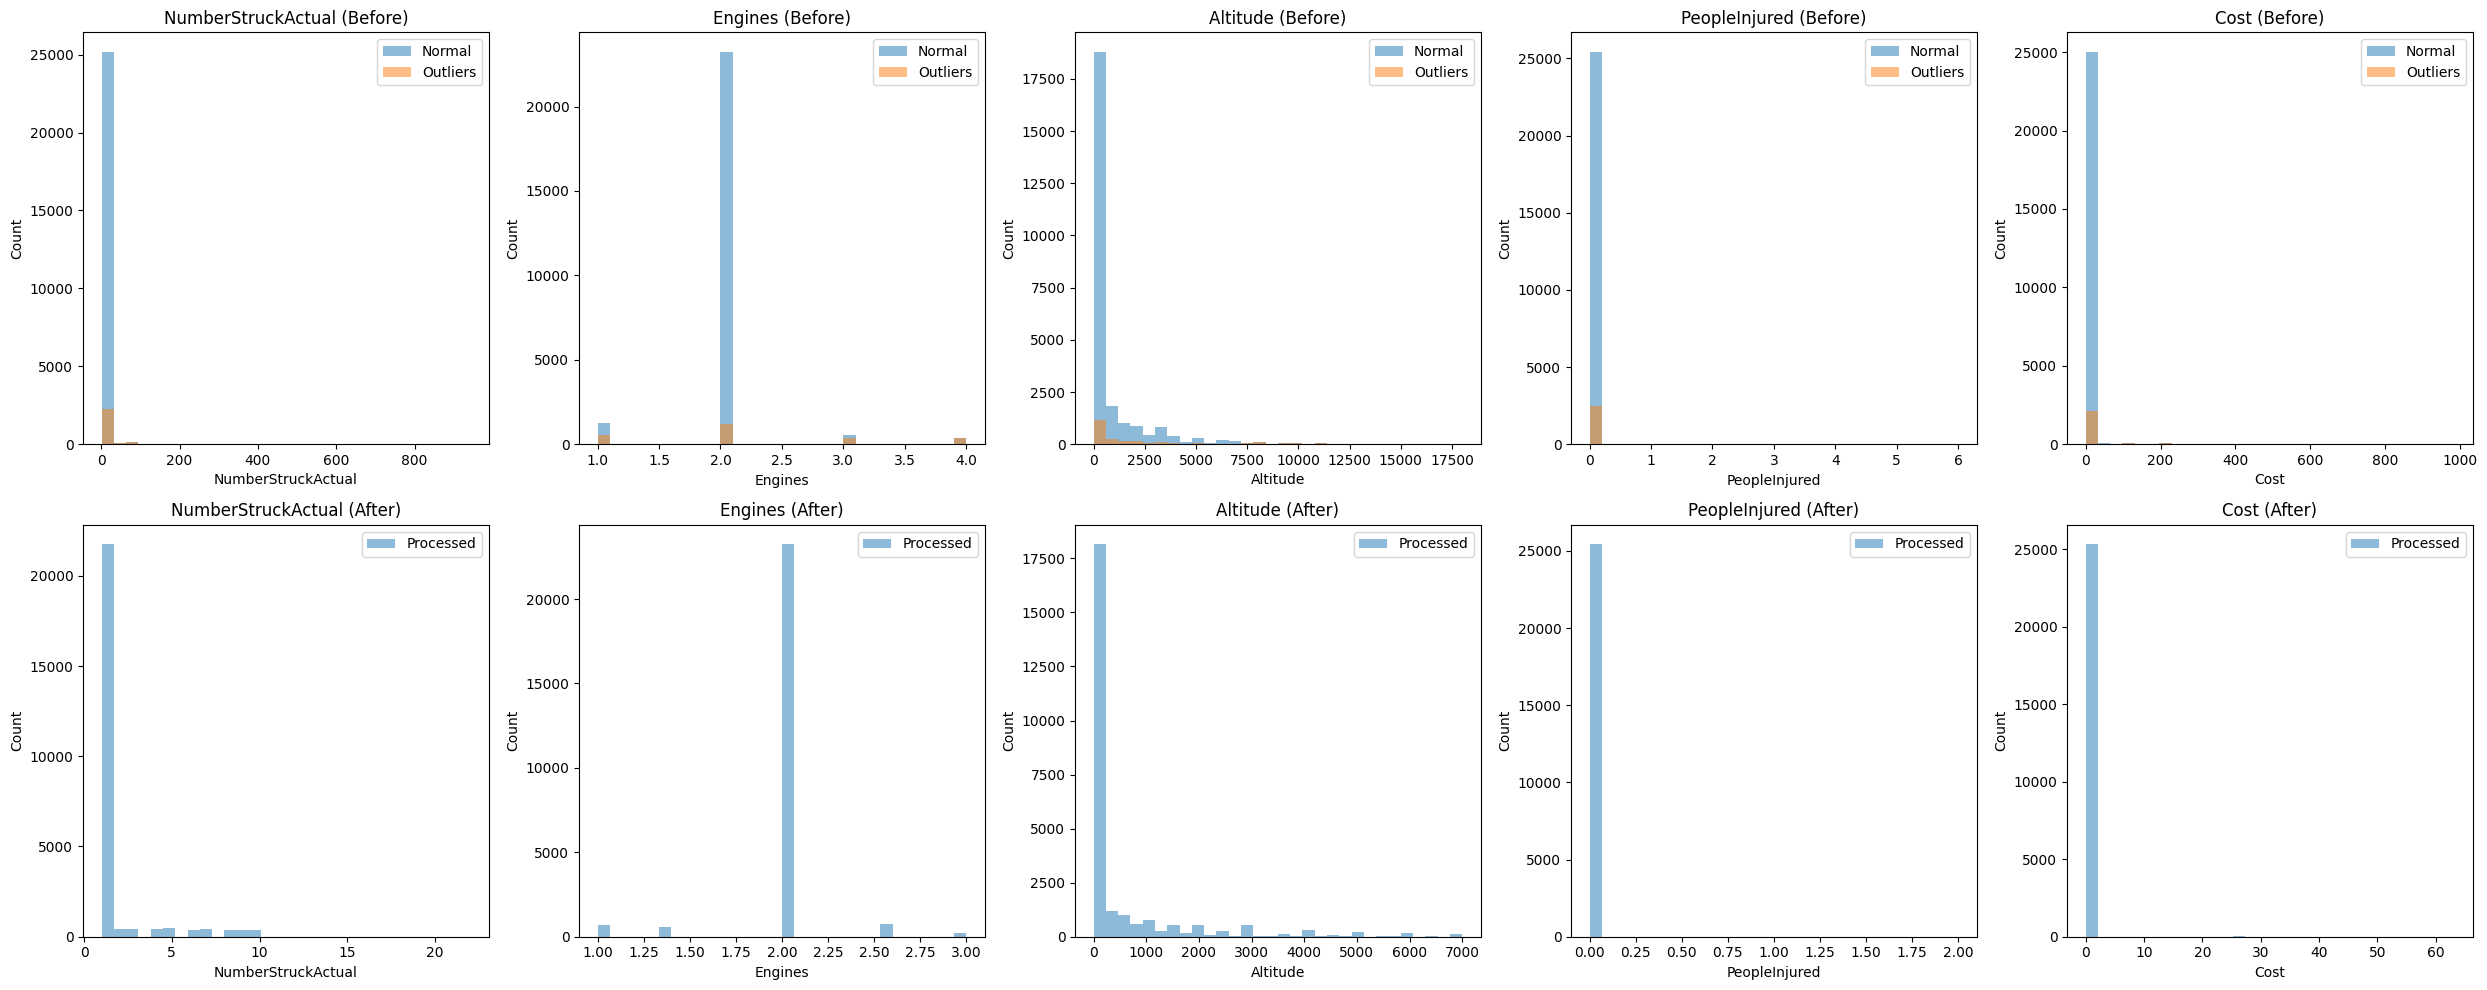


Detailed Statistics:

NumberStruckActual:
Before processing:
count    25428.000000
mean         2.699701
std         12.826052
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        942.000000
Name: NumberStruckActual, dtype: float64

After processing:
count    25428.000000
mean         1.720308
std          2.027972
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         22.000000
Name: NumberStruckActual, dtype: float64

Engines:
Before processing:
count    25428.000000
mean         2.003933
std          0.363277
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: Engines, dtype: float64

After processing:
count    25428.000000
mean         1.984367
std          0.227235
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Engines, dtype: float64

Altitude:
Before process

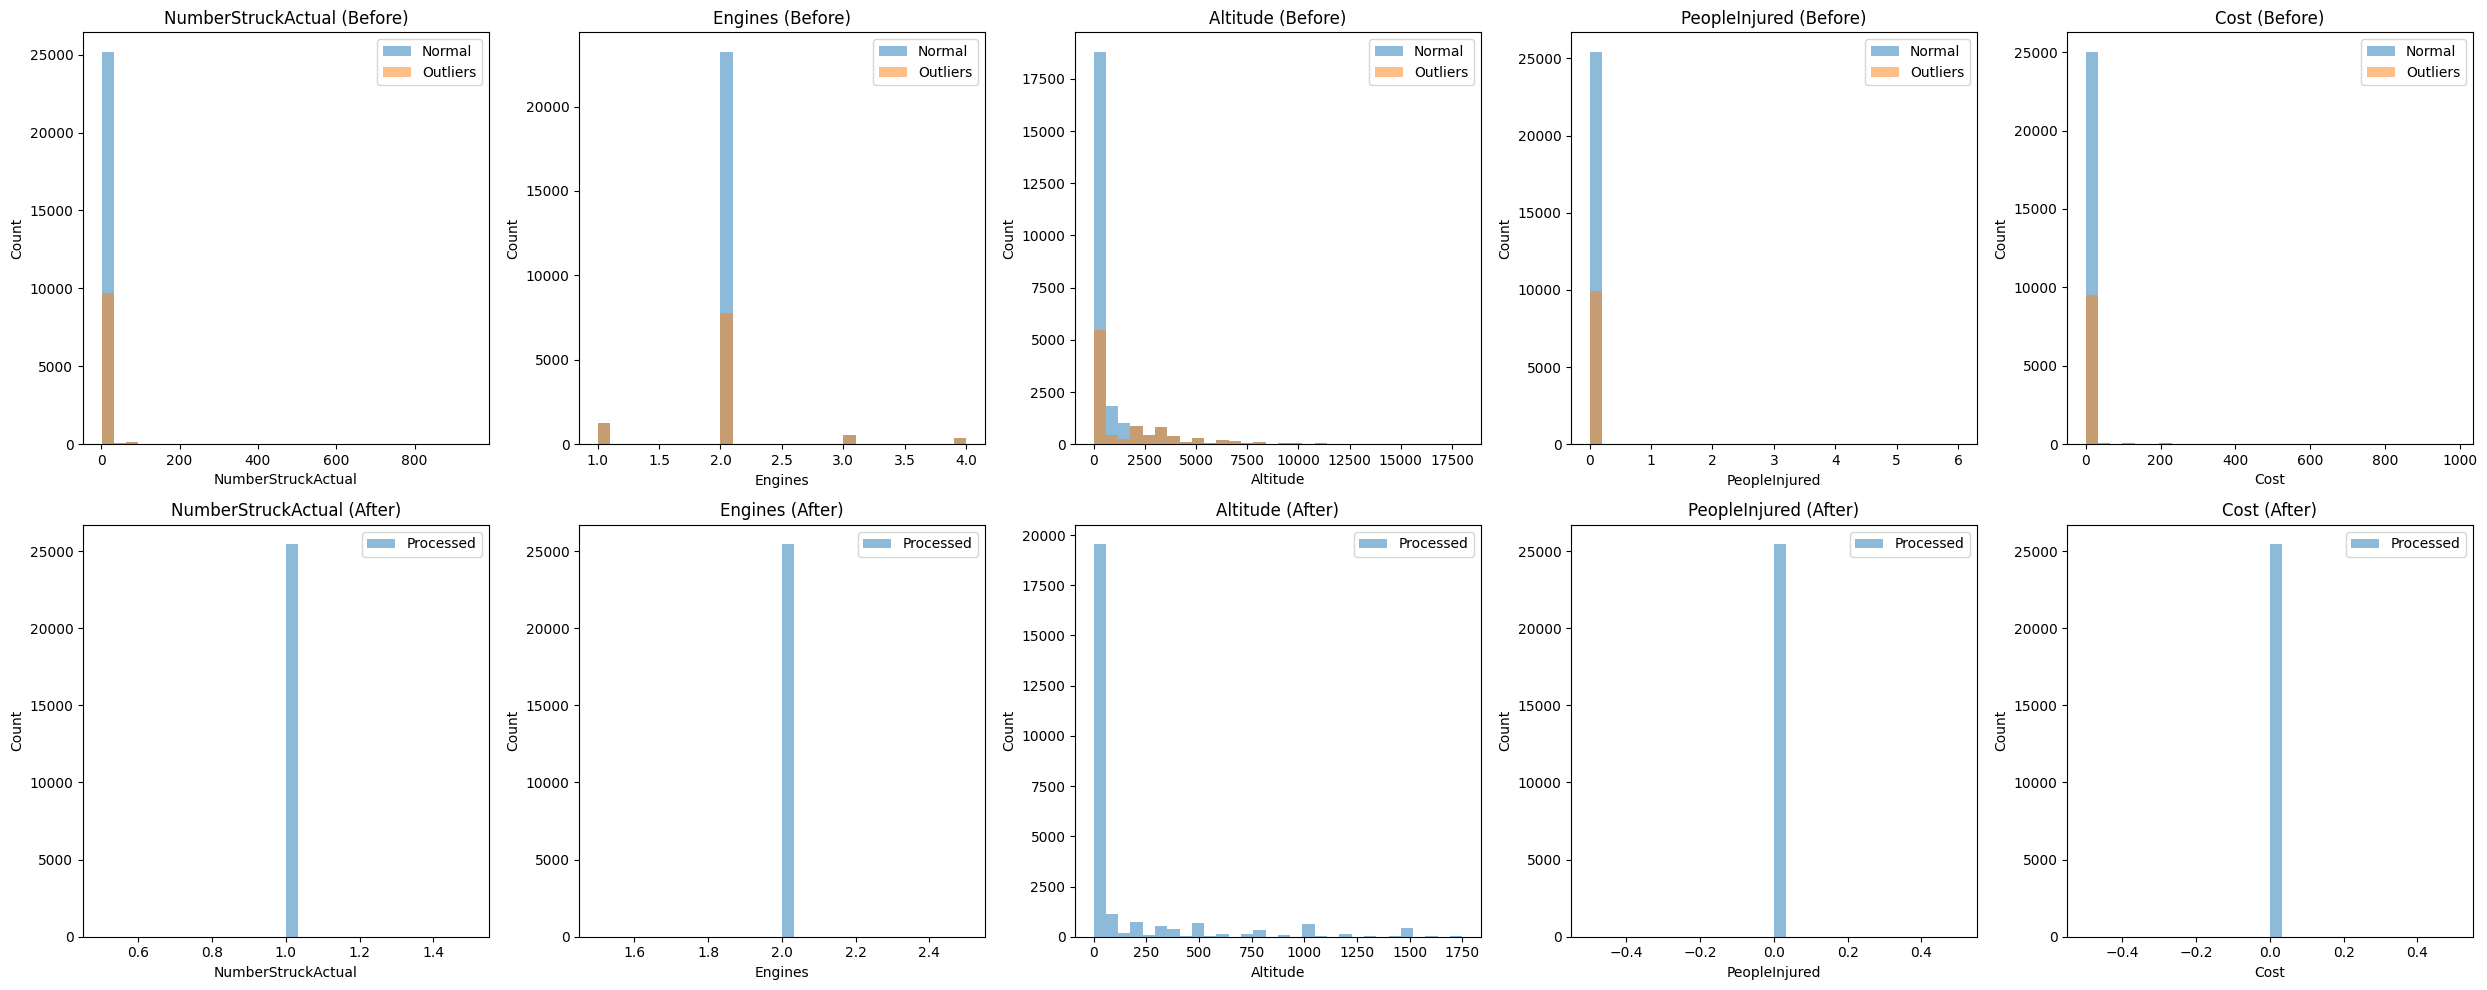


Detailed Statistics:

NumberStruckActual:
Before processing:
count    25428.000000
mean         2.699701
std         12.826052
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        942.000000
Name: NumberStruckActual, dtype: float64

After processing:
count    25428.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: NumberStruckActual, dtype: float64

Engines:
Before processing:
count    25428.000000
mean         2.003933
std          0.363277
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: Engines, dtype: float64

After processing:
count    25428.0
mean         2.0
std          0.0
min          2.0
25%          2.0
50%          2.0
75%          2.0
max          2.0
Name: Engines, dtype: float64

Altitude:
Before processing:
count    25428.000000
mean       798.902548
std       1739.998264
min      

In [40]:
def analyze_and_handle_outliers(data, method='kmeans', title="", plot=True):
    

    
    # Create a copy of the data
    data = data.copy()
    
    # Define column groups for different handling strategies
    median_cols = ['NumberStruckActual', 'Altitude','Cost']
    clip_cols = ['Engines', 'PeopleInjured']
    
    # Verify columns exist in the dataset
    numeric_cols = [ 'NumberStruckActual', 'Engines', 'Altitude', 'PeopleInjured','Cost']
    
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[numeric_cols])
    
    # Detect outliers based on chosen method
    if method.lower() == 'kmeans':
        kmeans = KMeans(n_clusters=3, random_state=42)
        kmeans.fit(scaled_data)
        distances = np.linalg.norm(scaled_data - kmeans.cluster_centers_[kmeans.labels_], axis=1)
        threshold = 2 * np.std(distances)
        outliers = distances > threshold
        
    elif method.lower() == 'dbscan':
        dbscan = DBSCAN(eps=0.5, min_samples=5)
        clusters = dbscan.fit_predict(scaled_data)
        outliers = clusters == -1
        
    elif method.lower() == 'isolation_forest':
        iso_forest = IsolationForest(random_state=42, contamination=0.1)
        outliers = iso_forest.fit_predict(scaled_data) == -1
        
    elif method.lower() == 'iqr':
        outliers = np.zeros(len(data), dtype=bool)
        for col in numeric_cols:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            col_outliers = (data[col] < lower_bound) | (data[col] > upper_bound)
            outliers = outliers | col_outliers
    
    else:
        raise ValueError(f"Unknown method: {method}")
    
    # Calculate initial statistics
    stats_before = {
        'total_samples': len(data),
        'outliers_count': sum(outliers),
        'outliers_percentage': (sum(outliers)/len(data))*100,
        'column_stats': {}
    }
    
    # Handle outliers using different strategies per column
    processed_data = data.copy()
    
    # Handle median columns
    for col in median_cols:
        if col in data.columns:
            normal_values = processed_data[~outliers][col]
            median_value = normal_values.median()
            processed_data.loc[outliers, col] = median_value
            print(f"\nReplaced outliers in {col} with median: {median_value}")
    
    # Handle clip columns
    for col in clip_cols:
        if col in data.columns:
            normal_values = processed_data[~outliers][col]
            lower_bound = normal_values.mean() - 3 * normal_values.std()
            upper_bound = normal_values.mean() + 3 * normal_values.std()
            processed_data.loc[outliers, col] = processed_data.loc[outliers, col].clip(lower_bound, upper_bound)
            print(f"\nClipped outliers in {col} to range: [{lower_bound:.2f}, {upper_bound:.2f}]")
    
    # Print summary
    print(f"\n{title}")
    print(f"Method: {method}")
    print(f"Total samples: {stats_before['total_samples']}")
    print(f"Number of outliers: {stats_before['outliers_count']}")
    print(f"Percentage of outliers: {stats_before['outliers_percentage']:.2f}%")
    
    # Plot distributions if requested
    if plot:
        n_cols = len(numeric_cols)
        fig, axes = plt.subplots(2, n_cols, figsize=(5*n_cols, 10))
        
        for idx, col in enumerate(numeric_cols):
            # Before handling
            axes[0, idx].hist(data[col], bins=30, alpha=0.5, label='Normal')
            axes[0, idx].hist(data[outliers][col], bins=30, alpha=0.5, label='Outliers')
            axes[0, idx].set_title(f'{col} (Before)')
            axes[0, idx].set_xlabel(col)
            axes[0, idx].set_ylabel('Count')
            axes[0, idx].legend()
            
            # After handling
            axes[1, idx].hist(processed_data[col], bins=30, alpha=0.5, label='Processed')
            axes[1, idx].set_title(f'{col} (After)')
            axes[1, idx].set_xlabel(col)
            axes[1, idx].set_ylabel('Count')
            axes[1, idx].legend()
        
        plt.tight_layout()
        plt.show()
    
    # Print detailed statistics
    print("\nDetailed Statistics:")
    for col in numeric_cols:
        print(f"\n{col}:")
        print("Before processing:")
        print(data[col].describe())
        print("\nAfter processing:")
        print(processed_data[col].describe())
    
    return processed_data, stats_before, outliers

# Compare all methods
methods = ['kmeans', 'dbscan', 'isolation_forest', 'iqr']
results = {}

# Try all methods
for method in methods:
    print(f"\nAnalyzing with {method}...")
    processed_df, stats, outliers = analyze_and_handle_outliers(
        data=df_imputed,
        method=method,
        title=f"Outlier Analysis using {method.upper()}",
        plot=True
    )
    results[method] = {
        'processed_data': processed_df,
        'stats': stats,
        'outliers': outliers
    }

# Compare results
print("\nSummary of all methods:")
for method in methods:
    stats = results[method]['stats']
    print(f"\n{method.upper()}:")
    print(f"Outliers detected: {stats['outliers_percentage']:.2f}%")

DBSCAN (Most Conservative)


Lowest outlier percentage: 0.30%
Minimal impact on data distribution
Best when you want to be very strict about outliers
Preserves most of the original data characteristics


KMEANS


Moderate outlier percentage: 3.18%
Good balance between detection and preservation
Works well for many types of distributions
Recommended for general use


ISOLATION_FOREST


Higher outlier percentage: 9.92%
More aggressive outlier detection
Good for complex, high-dimensional datasets
Useful when you suspect more hidden anomalies


IQR (Interquartile Range)


Extremely high outlier percentage: 38.13%
Too aggressive
Removes too much data
Not recommended for this dataset

I will carry on with dbscan

In [41]:
best_method = 'dbscan'  # Change this based on your analysis
df_no_outliers = results[best_method]['processed_data']

After removing outliers, the only value in people injured is 0, which will give us no predictive value, so drop

In [42]:
df_no_outliers['PeopleInjured'].unique()

array([0], dtype=int64)

In [43]:
df_no_outliers= df_no_outliers.drop('PeopleInjured', axis=1)

Log transformation to handle postive skewed data

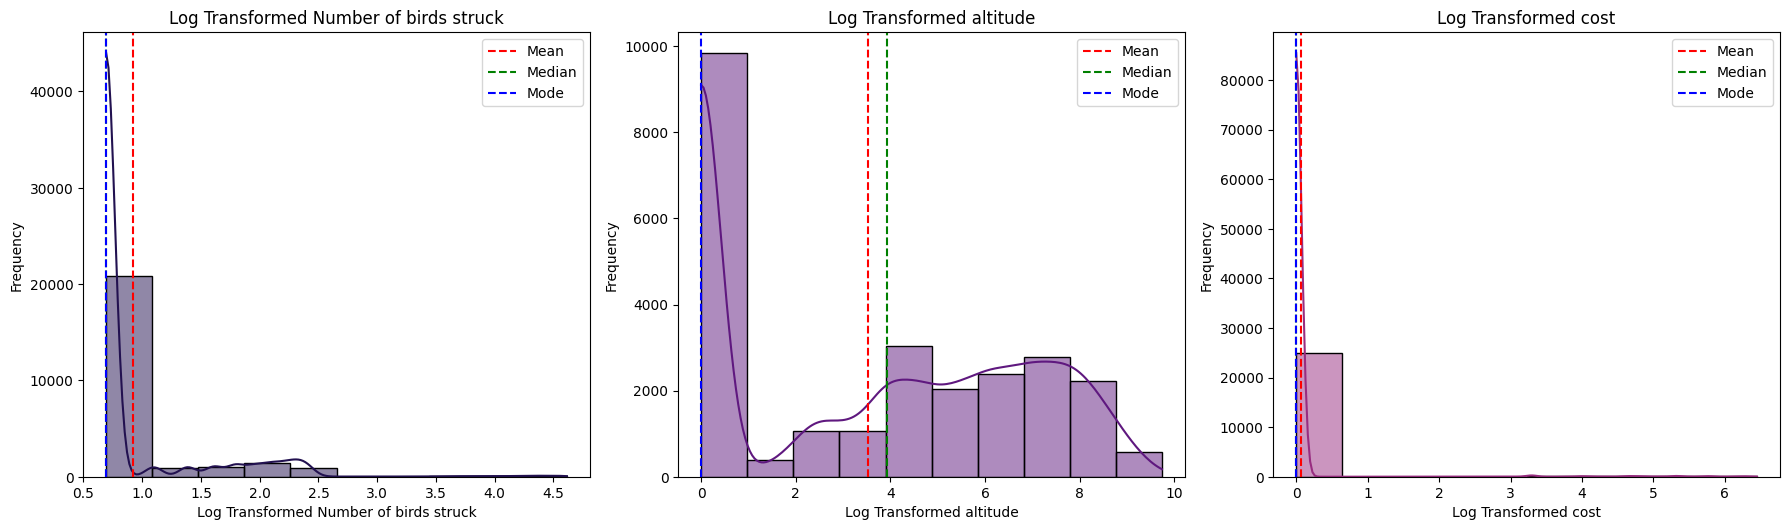

In [44]:
def drawK(x, index, name):
    mean = np.mean(x)
    median = np.median(x)
    mode = pd.Series(x).mode()[0]
    plt.subplot(2, 3, index + 1)
    sns.histplot(x, bins=10, kde=True, color=sns.color_palette("magma")[index])
    plt.title(name)
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.axvline(mean, color='r', linestyle='--', label='Mean')
    plt.axvline(median, color='g', linestyle='--', label='Median')
    plt.axvline(mode, color='b', linestyle='--', label='Mode')
    plt.legend()

plt.figure(figsize=(18, 10))

noStruck = df_no_outliers['NumberStruckActual']
altitude = df_no_outliers['Altitude']
cost = df_no_outliers['Cost']

df_no_outliers['log_noStruck']  = np.log(noStruck + 1)
df_no_outliers['log_altitude'] = np.log(altitude + 1)
df_no_outliers['log_cost'] = np.log(cost + 1)




drawK(df_no_outliers['log_noStruck'] , 0, 'Log Transformed Number of birds struck')

drawK(df_no_outliers['log_altitude'], 1, 'Log Transformed altitude')

drawK(df_no_outliers['log_cost'], 2, 'Log Transformed cost')


plt.tight_layout()
plt.show()

In [45]:
def create_baseline_model(df, target_column):
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    # Identify numeric and categorical columns
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    # Create preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    # Encode target if it's categorical
    if y.dtype == 'object':
        le = LabelEncoder()
        y = le.fit_transform(y)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.3, 
        random_state=42,
        stratify=y  # Maintain target distribution
    )

    # Create pipeline with preprocessor and decision tree
    baseline_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(
            random_state=42, 

        ))
    ])

    # Fit the model
    baseline_pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = baseline_pipeline.predict(X_test)
    
    return {
        'model': baseline_pipeline,
        'y_true': y_test,
        'y_pred': y_pred
    }

# Function to print model results
def print_model_results(model_results, model_name='Baseline Model'):
    """
    Print model performance using classification_report
    """
    print(f"{model_name} Performance:")
    print(classification_report(
        model_results['y_true'], 
        model_results['y_pred']
    ))
    print("\nConfusion Matrix:")
    print(confusion_matrix(model_results['y_true'], model_results['y_pred']))

# Main execution
try:
    # Replace with your actual dataframe and target column name
    baseline_results = create_baseline_model(df_no_outliers, 'Damage')
    print_model_results(baseline_results)

except Exception as e:
    print(f"An error occurred: {e}")

Baseline Model Performance:
              precision    recall  f1-score   support

           0       0.39      0.36      0.37       736
           1       0.93      0.94      0.94      6893

    accuracy                           0.88      7629
   macro avg       0.66      0.65      0.65      7629
weighted avg       0.88      0.88      0.88      7629


Confusion Matrix:
[[ 262  474]
 [ 418 6475]]


## Data Encoding

ordinal encoding for features with natural order

one hot encoding for features with no natural order

feature hashing for features with high cardinality

cylcical encoding for features with cyclic nature (time)

In [46]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import numpy as np
import pandas as pd

# First, let's check if we have the date column with the correct name
date_column = 'FlightDate'  # This is the column name in your data

# Define feature groups
ordinal_features = ['AltitudeBin', 'WildlifeSize', 'NumberStruck', 'ConditionsSky']
nominal_features = ['FlightPhase']
high_cardinality_features = ['AirportName', 'MakeModel', 'Operator', 'OriginState', 'WildlifeSpecies']

# Combine all features that will be encoded
features_to_encode = ordinal_features + nominal_features + high_cardinality_features

# Convert date and create temporal features
if date_column in df_no_outliers.columns:
    df_no_outliers[date_column] = pd.to_datetime(df_no_outliers[date_column])
    df_no_outliers['Month'] = df_no_outliers[date_column].dt.month
    df_no_outliers['Day'] = df_no_outliers[date_column].dt.day
    df_no_outliers['DayOfWeek'] = df_no_outliers[date_column].dt.dayofweek
    
    # Drop the original date column after extracting features
    df_no_outliers = df_no_outliers.drop(date_column, axis=1)

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_no_outliers['Damage'])

# Define preprocessing pipeline for ordinal and nominal features
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_features),
        ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), nominal_features)
    ]
)

# Fit and transform ordinal and nominal features
X_partial_encoded = preprocessor.fit_transform(df_no_outliers[ordinal_features + nominal_features])

# Handle high cardinality features with Target Encoding
if high_cardinality_features:
    target_encoder = TargetEncoder(cols=high_cardinality_features)
    X_target_encoded = target_encoder.fit_transform(df_no_outliers[high_cardinality_features], y_encoded)
    X_target_encoded = X_target_encoded.values if hasattr(X_target_encoded, 'values') else X_target_encoded
else:
    X_target_encoded = np.empty((df_no_outliers.shape[0], 0))

# Combine all transformed data
X_encoded = np.hstack([X_partial_encoded, X_target_encoded])

# Get feature names
ordinal_feature_names = ordinal_features
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(nominal_features)
target_feature_names = high_cardinality_features

# Combine feature names
encoded_feature_names = (
    ordinal_feature_names +
    list(onehot_feature_names) +
    target_feature_names
)

# Create initial DataFrame with encoded features
df_encoded = pd.DataFrame(
    X_encoded,
    columns=encoded_feature_names,
    index=df_no_outliers.index
)

# Define cyclical encoding function
def cyclical_encode(df, col, max_val):
    df[f'{col}_sin'] = np.sin(2 * np.pi * df[col] / max_val)
    df[f'{col}_cos'] = np.cos(2 * np.pi * df[col] / max_val)
    return df

# Apply cyclical encoding for datetime components
temporal_features = ['Month', 'Day', 'DayOfWeek']
cyclical_columns = {
    'Month': 12,
    'Day': 31,
    'DayOfWeek': 7
}

# Apply cyclical encoding only if temporal features exist
for col, max_val in cyclical_columns.items():
    if col in df_no_outliers.columns:
        temp_df = cyclical_encode(df_no_outliers[[col]].copy(), col, max_val)
        df_encoded[f'{col}_sin'] = temp_df[f'{col}_sin']
        df_encoded[f'{col}_cos'] = temp_df[f'{col}_cos']

# Add all remaining numeric columns from df_no_outliers that weren't encoded
columns_to_add = [col for col in df_no_outliers.columns 
                 if col not in features_to_encode 
                 and col not in temporal_features
                 and col != 'Damage'
                 and pd.api.types.is_numeric_dtype(df_no_outliers[col])]

for col in columns_to_add:
    df_encoded[col] = df_no_outliers[col]


df_encoded['Damage_Encoded'] = y_encoded

# Print the mapping of encoded labels to original values
print("Target Label Mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label}: {i}")

print("\nEncoded Features Shape:", df_encoded.shape)
print("\nEncoded Features Preview:")
print(df_encoded.head())

Target Label Mapping:
Caused damage: 0
No damage: 1

Encoded Features Shape: (25428, 35)

Encoded Features Preview:
   AltitudeBin  WildlifeSize  NumberStruck  ConditionsSky  FlightPhase_Climb  \
0          4.0           1.0           3.0            0.0                1.0   
1          0.0           2.0           3.0            2.0                0.0   
2          7.0           2.0           3.0            0.0                0.0   
3          7.0           2.0           3.0            2.0                1.0   
4          7.0           2.0           3.0            0.0                0.0   

   FlightPhase_Descent  FlightPhase_Landing Roll  FlightPhase_Parked  \
0                  0.0                       0.0                 0.0   
1                  0.0                       1.0                 0.0   
2                  0.0                       0.0                 0.0   
3                  0.0                       0.0                 0.0   
4                  0.0                     

In [47]:
cyclical_columns = [col for col in df_encoded.columns if col.endswith('_sin') or col.endswith('_cos')]
df_encoded_no_cyclical = df_encoded.drop(columns=cyclical_columns)


## Correlation Matrix

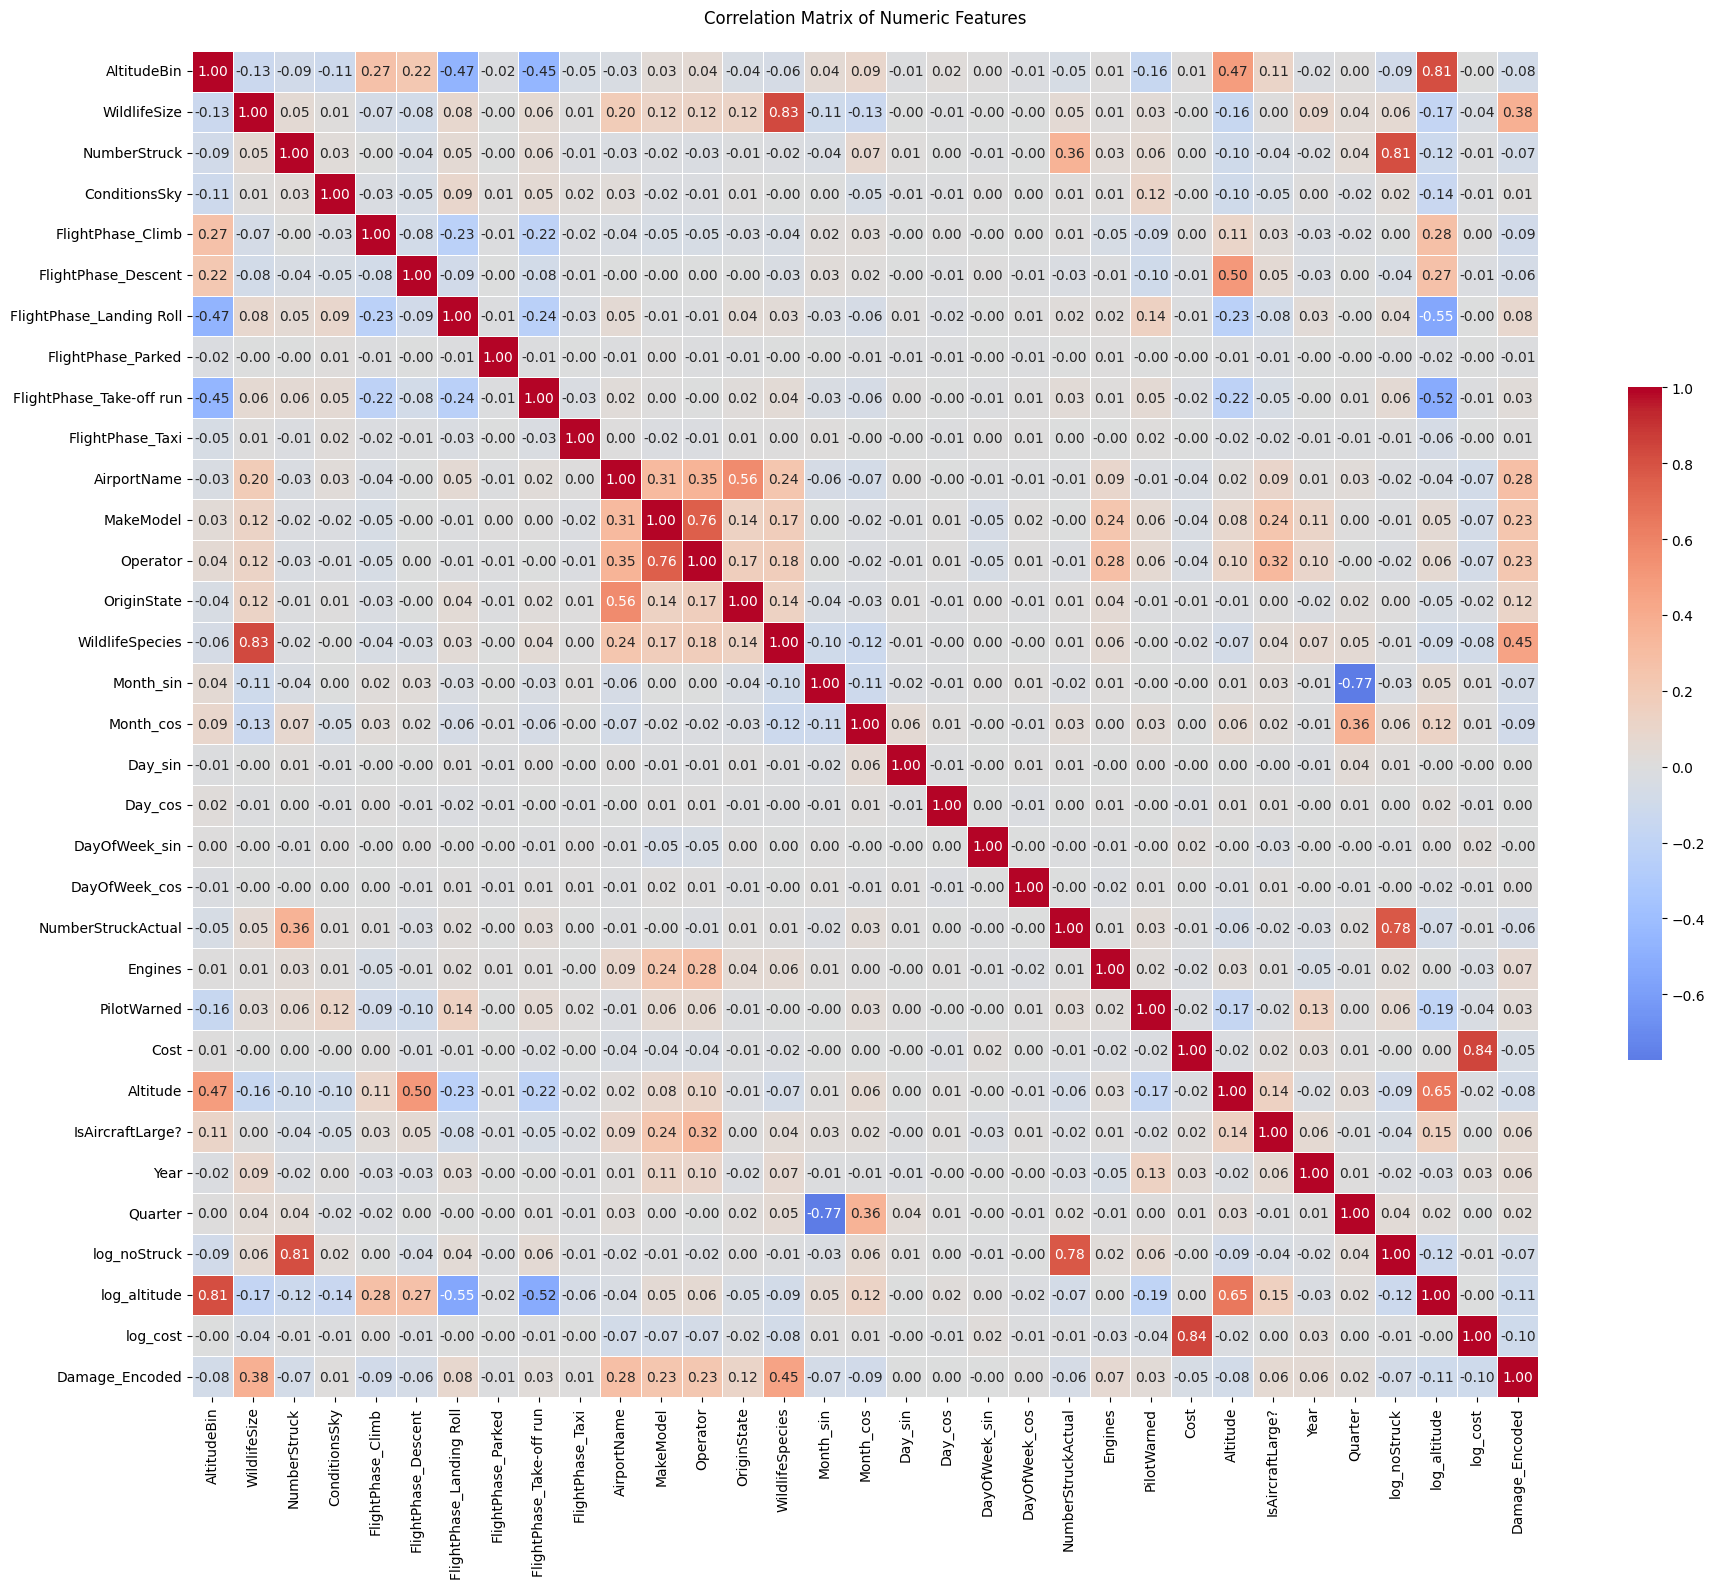


Correlations with Damage_Encoded:
Damage_Encoded              1.000000
WildlifeSpecies             0.446700
WildlifeSize                0.378816
AirportName                 0.281230
MakeModel                   0.232787
Operator                    0.225878
OriginState                 0.116250
FlightPhase_Landing Roll    0.083836
Engines                     0.066744
IsAircraftLarge?            0.058571
Year                        0.056898
PilotWarned                 0.033996
FlightPhase_Take-off run    0.026960
Quarter                     0.023563
ConditionsSky               0.009488
FlightPhase_Taxi            0.007767
DayOfWeek_cos               0.004244
Day_sin                     0.000536
Day_cos                     0.000496
DayOfWeek_sin              -0.000138
FlightPhase_Parked         -0.006952
Cost                       -0.048035
NumberStruckActual         -0.056648
FlightPhase_Descent        -0.063691
log_noStruck               -0.068291
Month_sin                  -0.068790
Num

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64','int32']).columns
numeric_df = df_encoded[numeric_columns]

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Create a figure with a larger size
plt.figure(figsize=(20, 16))

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            square=True,  # Make the plot square-shaped
            fmt='.2f',  # Round correlation values to 2 decimal places
            linewidths=0.5,  # Add gridlines
            cbar_kws={"shrink": .5})  # Adjust colorbar size

plt.title('Correlation Matrix of Numeric Features', pad=20)
plt.tight_layout()
plt.show()
# Additionally, let's print correlations specifically with Damage_Encoded
print("\nCorrelations with Damage_Encoded:")
damage_correlations = correlation_matrix['Damage_Encoded'].sort_values(ascending=False)
print(damage_correlations)

## Split the data set

This helps avoid data leakage when dealing with the skewed distribution of the target variable

In [49]:
# Separate features and target
X = df_encoded_no_cyclical.drop('Damage_Encoded', axis=1)
y = df_encoded_no_cyclical['Damage_Encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y  # Maintain target distribution
)


Evaluation

In [50]:
def evaluate_model(model, X_test, y_test, label, plt):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Print confusion matrix
    print(f"\nConfusion Matrix for {label}:")
    print(confusion_matrix(y_test, y_pred))
    
    # Print classification report
    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    
    # ROC Curve (for binary classification)
    if len(np.unique(y_test)) == 2:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')


## Data imbalance handling

(on training data only)

SMOTE

SMOTE addresses class imbalance by synthesizing new minority class samples


Confusion Matrix for Base Model:
[[ 303  433]
 [ 463 6430]]

Classification Report for Base Model:
               precision    recall  f1-score   support

Caused damage       0.40      0.41      0.40       736
    No damage       0.94      0.93      0.93      6893

     accuracy                           0.88      7629
    macro avg       0.67      0.67      0.67      7629
 weighted avg       0.88      0.88      0.88      7629


Applying SMOTE

Confusion Matrix for SMOTE:
[[ 334  402]
 [ 652 6241]]

Classification Report for SMOTE:
               precision    recall  f1-score   support

Caused damage       0.34      0.45      0.39       736
    No damage       0.94      0.91      0.92      6893

     accuracy                           0.86      7629
    macro avg       0.64      0.68      0.66      7629
 weighted avg       0.88      0.86      0.87      7629


Applying ADASYN

Confusion Matrix for ADASYN:
[[ 328  408]
 [ 652 6241]]

Classification Report for ADASYN:
               prec

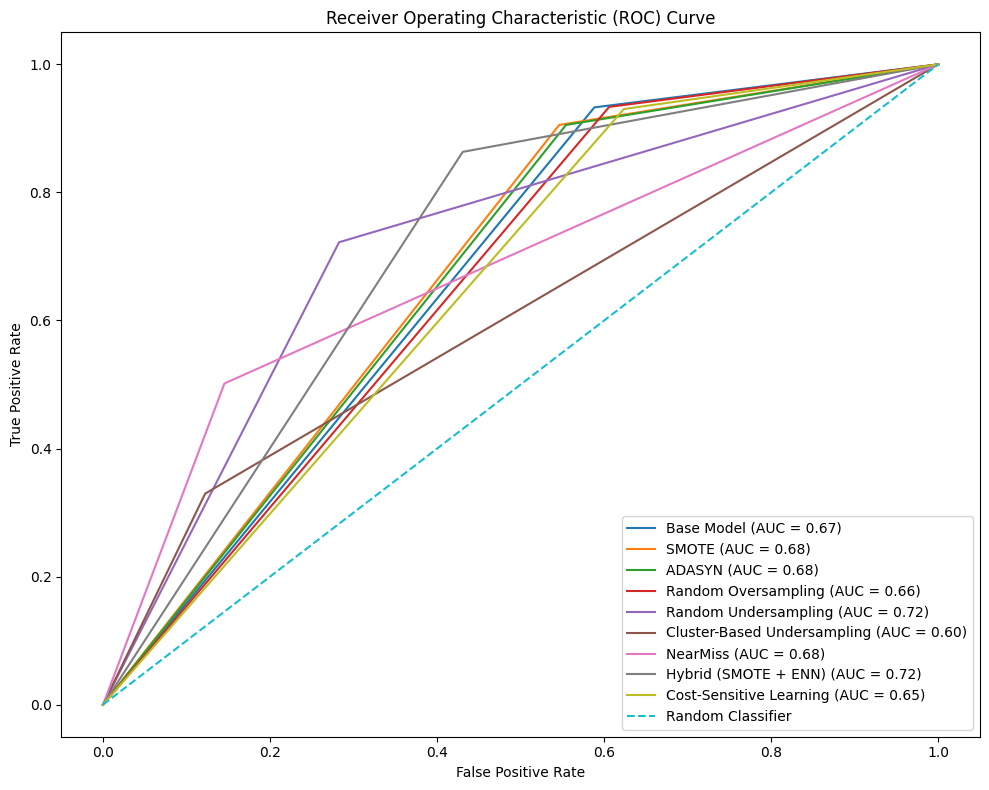

In [51]:
# Prepare for ROC curve plotting
plt.figure(figsize=(10, 8))

# Base Model
base_model = DecisionTreeClassifier(random_state=42)
base_model.fit(X_train, y_train)
evaluate_model(base_model, X_test, y_test, "Base Model", plt)

# Resampling Techniques
techniques = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "Cluster-Based Undersampling": ClusterCentroids(random_state=42),
    "NearMiss": NearMiss(version=1),
    "Hybrid (SMOTE + ENN)": SMOTEENN(random_state=42)
}

# Save the hybrid resampled data when we get to it
for label, resampler in techniques.items():
    print(f"\nApplying {label}")
    X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)
    
    # Save the hybrid resampled data
    if label == "Hybrid (SMOTE + ENN)":
        # Convert to dataframes and save
        X_hybrid_processed = pd.DataFrame(X_resampled, columns=X_train.columns)
        y_hybrid_processed = pd.Series(y_resampled, name='target')
        
        # Save the datasets
        X_hybrid_processed.to_csv('X_train_hybrid_processed.csv', index=False)
        y_hybrid_processed.to_csv('y_train_hybrid_processed.csv', index=False)
        print("\nHybrid resampled datasets saved successfully!")
        print(f"Training set shape after SMOTEENN: {X_hybrid_processed.shape}")
        print(f"Class distribution after SMOTEENN:\n{pd.Series(y_hybrid_processed).value_counts(normalize=True)}")
    
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_resampled, y_resampled)
    evaluate_model(model, X_test, y_test, label, plt)

# Cost-Sensitive Learning
print("\nCost-Sensitive Learning")
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

cost_sensitive_model = DecisionTreeClassifier(random_state=42, class_weight=class_weights_dict)
cost_sensitive_model.fit(X_train, y_train)
evaluate_model(cost_sensitive_model, X_test, y_test, "Cost-Sensitive Learning", plt)

# Finalize ROC Curve
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

try changing the class weights to see how it affects the model

In [52]:

# Decision tree with class weights
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.37      0.38      0.37       736
           1       0.93      0.93      0.93      6893

    accuracy                           0.88      7629
   macro avg       0.65      0.65      0.65      7629
weighted avg       0.88      0.88      0.88      7629



adding a decicsion theshold

In [53]:
# Train the decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Get predicted probabilities
y_prob = dt.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Set a custom threshold
threshold = 1
y_pred_thresholded = (y_prob >= threshold).astype(int)

# Evaluate
print("Default Threshold (0.5):")
print(classification_report(y_test, dt.predict(X_test)))
print("\nCustom Threshold (1):")
print(classification_report(y_test, y_pred_thresholded))


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
optimal_idx = np.argmax(tpr - fpr)  # Example of maximizing true positives minus false positives
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")


Default Threshold (0.5):
              precision    recall  f1-score   support

           0       0.40      0.41      0.40       736
           1       0.94      0.93      0.93      6893

    accuracy                           0.88      7629
   macro avg       0.67      0.67      0.67      7629
weighted avg       0.88      0.88      0.88      7629


Custom Threshold (1):
              precision    recall  f1-score   support

           0       0.40      0.41      0.40       736
           1       0.94      0.93      0.93      6893

    accuracy                           0.88      7629
   macro avg       0.67      0.67      0.67      7629
weighted avg       0.88      0.88      0.88      7629

Optimal Threshold: 1.0


the threshold has no impact on the accuracy (or any other metric) of the model.

lets try combining class weigting and smote techniques


Confusion Matrix for Base Model:
[[ 303  433]
 [ 463 6430]]

Classification Report for Base Model:
               precision    recall  f1-score   support

Caused damage       0.40      0.41      0.40       736
    No damage       0.94      0.93      0.93      6893

     accuracy                           0.88      7629
    macro avg       0.67      0.67      0.67      7629
 weighted avg       0.88      0.88      0.88      7629


Applying SMOTE

Confusion Matrix for SMOTE:
[[ 300  436]
 [ 641 6252]]

Classification Report for SMOTE:
               precision    recall  f1-score   support

Caused damage       0.32      0.41      0.36       736
    No damage       0.93      0.91      0.92      6893

     accuracy                           0.86      7629
    macro avg       0.63      0.66      0.64      7629
 weighted avg       0.88      0.86      0.87      7629


Applying ADASYN

Confusion Matrix for ADASYN:
[[ 300  436]
 [ 618 6275]]

Classification Report for ADASYN:
               prec

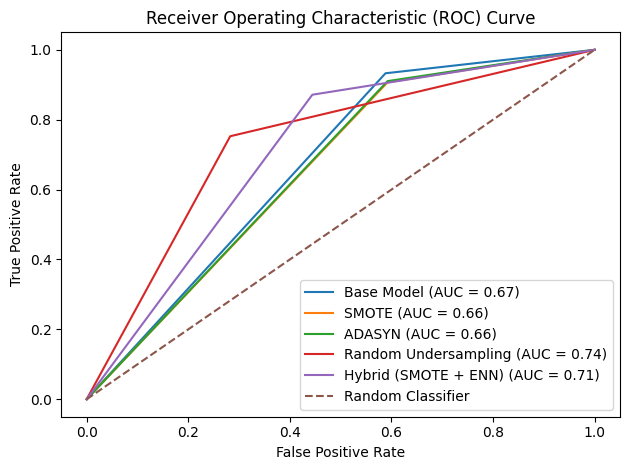

In [54]:


# Base Model
base_model = DecisionTreeClassifier(random_state=42)
base_model.fit(X_train, y_train)
evaluate_model(base_model, X_test, y_test, "Base Model", plt)

# Compute class weights for resampling techniques
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Resampling Techniques
techniques = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "Hybrid (SMOTE + ENN)": SMOTEENN(random_state=42)
}

for label, resampler in techniques.items():
    print(f"\nApplying {label}")
    X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

    # Apply class weighting to the decision tree
    model = DecisionTreeClassifier(random_state=42, class_weight=class_weights_dict)
    model.fit(X_resampled, y_resampled)

    evaluate_model(model, X_test, y_test, label, plt)



# Finalize ROC Curve
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


Increase the min_samples_split, min_samples_leaf, or max_depth parameters to allow leaves to include more diverse samples. This will make the predicted probabilities less extreme (i.e., closer to intermediate values like 0.3 or 0.7).

In [55]:
dt = DecisionTreeClassifier(min_samples_split=10,  # Increased from default of 2
    min_samples_leaf=5,    # Increased from default of 1
    max_depth=5,           # Limited depth
    class_weight='balanced'  )
dt.fit(X_train, y_train)
# Predictions
y_pred = dt.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.28      0.78      0.41       736
           1       0.97      0.78      0.87      6893

    accuracy                           0.78      7629
   macro avg       0.62      0.78      0.64      7629
weighted avg       0.90      0.78      0.82      7629



the recall improved drastically, however everything else worsened. 

So far, the hybrid approach (SMOTE + ENN) has the best tradeoff between precision and recall, and it performed the best in terms of ROC AUC. when it is combined with class weights. it is a bit better in accuracy but the recall for the minority class is worse.

In [56]:
X_hybrid_processed=  pd.read_csv('X_train_hybrid_processed.csv')
y_hybrid_processed = pd.read_csv('y_train_hybrid_processed.csv')


In [57]:

# Calculate class distribution
class_distribution = y_hybrid_processed['target'].value_counts(normalize=True) * 100

# Display percentages
print("Class Distribution in Hybrid Resampled Data:")
for class_label, percentage in class_distribution.items():
    print(f"Class {class_label}: {percentage:.2f}%")

Class Distribution in Hybrid Resampled Data:
Class 0: 56.96%
Class 1: 43.04%


In [58]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint, uniform
import numpy as np
import multiprocessing

# Parameter distributions for RandomizedSearchCV
dt_params = {
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

svm_params = {
    'C': uniform(0.1, 10.0),
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1.0]
}

lr_params = {
    'C': uniform(0.1, 10.0),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': randint(100, 1000)
}

# Create the models
dt_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(random_state=42)
lr_model = LogisticRegression(random_state=42)

# Subsample the data
sample_fraction = 0.1  # Adjust the fraction for the subsample size
X_sample, _, y_sample, _ = train_test_split(
    X_hybrid_processed, y_hybrid_processed, 
    test_size=(1 - sample_fraction), 
    stratify=y_hybrid_processed, 
    random_state=42
)

# Create RandomizedSearchCV objects with optimized settings
dt_random = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=dt_params,
    n_iter=10,  # Reduced the number of iterations
    cv=2,       # Reduced cross-validation folds
    scoring='accuracy',
    n_jobs=-1,  # Use all CPU cores
    random_state=42,
    verbose=0,  # Reduced verbosity for speed
    refit=True   # Automatically refit the best model
)

svm_random = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=svm_params,
    n_iter=10,  # Reduced the number of iterations
    cv=2,       # Reduced cross-validation folds
    scoring='accuracy',
    n_jobs=-1,  # Use all CPU cores
    random_state=42,
    verbose=0,  # Reduced verbosity for speed
    refit=True   # Automatically refit the best model
)

lr_random = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=lr_params,
    n_iter=10,  # Reduced the number of iterations
    cv=2,       # Reduced cross-validation folds
    scoring='accuracy',
    n_jobs=-1,  # Use all CPU cores
    random_state=42,
    verbose=0,  # Reduced verbosity for speed
    refit=True   # Automatically refit the best model
)

# Fit the models on the subsampled data
print("Training Decision Tree on subsampled data...")
dt_random.fit(X_sample, y_sample)

print("\nTraining SVM on subsampled data...")
svm_random.fit(X_sample, y_sample)

print("\nTraining Logistic Regression on subsampled data...")
lr_random.fit(X_sample, y_sample)

# Print best parameters and scores for each model
models = {'Decision Tree': dt_random, 'SVM': svm_random, 'Logistic Regression': lr_random}

for name, model in models.items():
    print(f"\nBest parameters for {name}:")
    print(model.best_params_)
    print(f"Best cross-validation score: {model.best_score_:.4f}")


Training Decision Tree on subsampled data...


C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_


Training SVM on subsampled data...


KeyboardInterrupt: 

# Feature Engineering

## Feature Selection

In [66]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Train the model on the full dataset
dt.fit(X_hybrid_processed, y_hybrid_processed)

# Evaluate on the full dataset (split your data if not already done)
# Assuming X_test and y_test are defined and separate from the training data
y_pred_full = dt.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)
precision_full = precision_score(y_test, y_pred_full, average='weighted')
recall_full = recall_score(y_test, y_pred_full, average='weighted')
f1_full = f1_score(y_test, y_pred_full, average='weighted')

print('Before Feature Selection:')
print(f"Accuracy before Feature Selection: {accuracy_full:.2f}")
print(f"Precision before Feature Selection: {precision_full:.2f}")
print(f"Recall before Feature Selection: {recall_full:.2f}")
print(f"F1 Score before Feature Selection: {f1_full:.2f}")

# Sequential Feature Selector (Forward Selection)
sfs = SequentialFeatureSelector(
    estimator=dt,
    n_features_to_select=int(0.7 * X_hybrid_processed.shape[1]),  # Select 70% of features
    direction='forward',
    n_jobs=-1
)

# Fit the selector on the training data
sfs.fit(X_hybrid_processed, y_hybrid_processed)

# Get selected feature indices and names
selected_features = sfs.get_support(indices=True)
print('\nForward Feature Selection:')
print("Selected Features:", selected_features)

# Create new datasets with selected features
X_train_selected = X_hybrid_processed.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]  # Ensure X_test matches the selected features

# Retrain the model with selected features
dt.fit(X_train_selected, y_hybrid_processed)

# Evaluate the model on the selected features
y_pred_selected = dt.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected, average='weighted')
recall_selected = recall_score(y_test, y_pred_selected, average='weighted')
f1_selected = f1_score(y_test, y_pred_selected, average='weighted')

print(f"Accuracy after Forward Feature Selection: {accuracy_selected:.2f}")
print(f"Precision after Forward Feature Selection: {precision_selected:.2f}")
print(f"Recall after Forward Feature Selection: {recall_selected:.2f}")
print(f"F1 Score after Forward Feature Selection: {f1_selected:.2f}")

# Sequential Feature Selector (Backward Selection)
sbs = SequentialFeatureSelector(
    estimator=dt,
    n_features_to_select=int(0.7 * X_hybrid_processed.shape[1]),  # Select 70% of features
    direction='backward',
    n_jobs=-1
)

# Fit the selector on the training data
sbs.fit(X_hybrid_processed, y_hybrid_processed)

# Get selected feature indices and names
selected_features = sbs.get_support(indices=True)
print('\nBackward Feature Selection:')
print("Selected Features:", selected_features)

# Create new datasets with selected features
X_train_selected = X_hybrid_processed.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]  # Ensure X_test matches the selected features

# Retrain the model with selected features
dt.fit(X_train_selected, y_hybrid_processed)

# Evaluate the model on the selected features
y_pred_selected = dt.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected, average='weighted')
recall_selected = recall_score(y_test, y_pred_selected, average='weighted')
f1_selected = f1_score(y_test, y_pred_selected, average='weighted')

print(f"Accuracy after Backward Feature Selection: {accuracy_selected:.2f}")
print(f"Precision after Backward Feature Selection: {precision_selected:.2f}")
print(f"Recall after Backward Feature Selection: {recall_selected:.2f}")
print(f"F1 Score after Backward Feature Selection: {f1_selected:.2f}")


Before Feature Selection:
Accuracy before Feature Selection: 0.83
Precision before Feature Selection: 0.89
Recall before Feature Selection: 0.83
F1 Score before Feature Selection: 0.86

Forward Feature Selection:
Selected Features: [ 0 1 2 3 4 5 6 7 8 9 10 13 15 16 18 20 23 25 27 ]
Accuracy after Forward Feature Selection: 0.84
Precision after Forward Feature Selection: 0.89
Recall after Forward Feature Selection: 0.84
F1 Score after Forward Feature Selection: 0.86

Backward Feature Selection:
Selected Features: [ 0 1 2 3 4 6 8 9 10 11 14 16 17 18 20 23 24 25 26 ]
Accuracy after Backward Feature Selection: 0.83
Precision after Backward Feature Selection: 0.89
Recall after Backward Feature Selection: 0.83
F1 Score after Backward Feature Selection: 0.85


## 3 Individual Models


Training and Evaluating Decision Tree...

Decision Tree Performance:
Accuracy: 0.83
Minority Class Metrics:
  Precision: 0.30
  Recall: 0.62
  F1 Score: 0.41
Majority Class Metrics:
  Precision: 0.95
  Recall: 0.85
  F1 Score: 0.90

Training and Evaluating SVM...


C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


SVM Performance:
Accuracy: 0.10
Minority Class Metrics:
  Precision: 0.10
  Recall: 1.00
  F1 Score: 0.18
Majority Class Metrics:
  Precision: 0.00
  Recall: 0.00
  F1 Score: 0.00

Training and Evaluating Logistic Regression...

Logistic Regression Performance:
Accuracy: 0.72
Minority Class Metrics:
  Precision: 0.23
  Recall: 0.81
  F1 Score: 0.36
Majority Class Metrics:
  Precision: 0.97
  Recall: 0.71
  F1 Score: 0.82


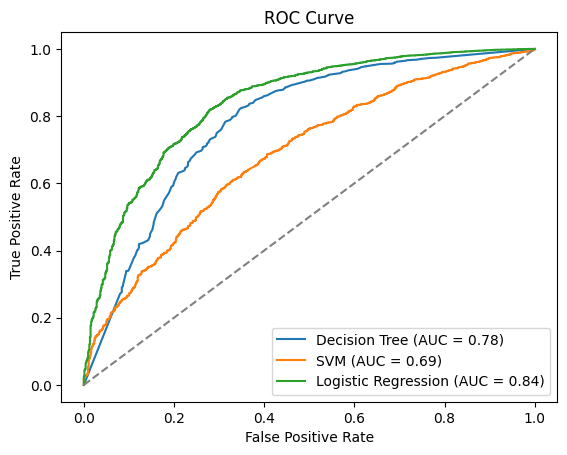

KeyboardInterrupt: 

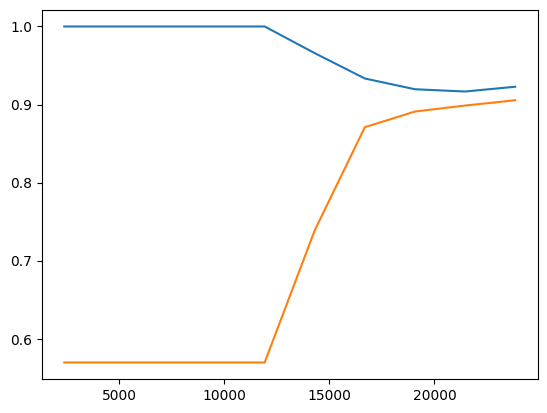

In [62]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, classification_report)
from sklearn.model_selection import cross_val_score, learning_curve, StratifiedKFold
import pandas as pd

# Selected features
selected_features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15, 16, 18, 20, 23, 25, 27]
X_train_selected = X_hybrid_processed.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]
y_hybrid_processed = y_hybrid_processed.values.flatten()
# Define the models with explicit hyperparameters
dt = DecisionTreeClassifier(criterion='gini',
 max_depth= 18,
 max_features= 'sqrt',
 min_samples_leaf= 9,
 min_samples_split=3, 
 random_state= 42)
svm = SVC(C=1.0, kernel='rbf', probability=True, random_state=42)    
lr = LogisticRegression(C=0.1, solver='liblinear', random_state=42)

models = {"Decision Tree": dt, "SVM": svm, "Logistic Regression": lr}

# Evaluate each model
evaluation_results = {}
for name, model in models.items():
    print(f"\nTraining and Evaluating {name}...")

    # Train the model
    model.fit(X_train_selected, y_hybrid_processed)

    # Predictions and probabilities
    y_pred = model.predict(X_test_selected)
    y_prob = model.predict_proba(X_test_selected)[:, 1] if hasattr(model, 'predict_proba') else None

    # Overall Metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, target_names=["Minority", "Majority"])

    minority_metrics = report["Minority"]
    majority_metrics = report["Majority"]

    # Store the results
    evaluation_results[name] = {
        "Accuracy": accuracy,
        "Minority Precision": minority_metrics["precision"],
        "Minority Recall": minority_metrics["recall"],
        "Minority F1 Score": minority_metrics["f1-score"],
        "Majority Precision": majority_metrics["precision"],
        "Majority Recall": majority_metrics["recall"],
        "Majority F1 Score": majority_metrics["f1-score"],
    }

    # Print metrics for each class
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Minority Class Metrics:")
    print(f"  Precision: {minority_metrics['precision']:.2f}")
    print(f"  Recall: {minority_metrics['recall']:.2f}")
    print(f"  F1 Score: {minority_metrics['f1-score']:.2f}")
    print(f"Majority Class Metrics:")
    print(f"  Precision: {majority_metrics['precision']:.2f}")
    print(f"  Recall: {majority_metrics['recall']:.2f}")
    print(f"  F1 Score: {majority_metrics['f1-score']:.2f}")

    # Plot the ROC Curve if probabilities are available
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

# Finalize ROC Curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Learning Curves
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_selected, y_hybrid_processed, cv=cv, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label=f'{name} Train')
    plt.plot(train_sizes, test_scores_mean, label=f'{name} Test')

plt.title('Learning Curves')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Summary of Results
print("\nSummary of Evaluation Results:")
for name, metrics in evaluation_results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.2f}")


model bias and variance comment

## Ensemble Models

Class weights: {0: 0.8778330019880716, 1: 1.1616679821099711}

Training and Evaluating Bagging (DT)...


C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was pass

Accuracy: 0.85
Precision: 0.90
Recall: 0.85
F1 Score: 0.87
AUC-ROC: 0.85
Cross-Val Accuracy: 0.94 (+/- 0.00)
Bias: 0.06
Variance: 0.00
Per-Class Metrics:
  Class 0 - Precision: 0.35, Recall: 0.67, F1: 0.46
  Class 1 - Precision: 0.96, Recall: 0.87, F1: 0.91

Training and Evaluating Boosting (AdaBoost DT)...


C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprec

Accuracy: 0.86
Precision: 0.90
Recall: 0.86
F1 Score: 0.87
AUC-ROC: 0.82
Cross-Val Accuracy: 0.96 (+/- 0.00)
Bias: 0.04
Variance: 0.00
Per-Class Metrics:
  Class 0 - Precision: 0.36, Recall: 0.63, F1: 0.46
  Class 1 - Precision: 0.96, Recall: 0.88, F1: 0.92

Training and Evaluating Voting Classifier...


C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:132: DataConversi

Accuracy: 0.81
Precision: 0.90
Recall: 0.81
F1 Score: 0.84
AUC-ROC: 0.83
Cross-Val Accuracy: 0.91 (+/- 0.01)
Bias: 0.09
Variance: 0.00
Per-Class Metrics:
  Class 0 - Precision: 0.29, Recall: 0.72, F1: 0.42
  Class 1 - Precision: 0.96, Recall: 0.82, F1: 0.88

Training and Evaluating Stacking Classifier...


C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative 

Accuracy: 0.78
Precision: 0.90
Recall: 0.78
F1 Score: 0.82
AUC-ROC: 0.83
Cross-Val Accuracy: 0.90 (+/- 0.01)
Bias: 0.10
Variance: 0.00
Per-Class Metrics:
  Class 0 - Precision: 0.26, Recall: 0.74, F1: 0.39
  Class 1 - Precision: 0.97, Recall: 0.78, F1: 0.86


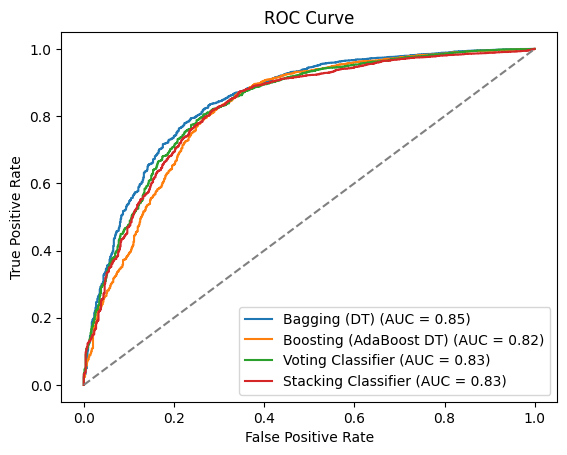

C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\96653\AppData\Roaming\Python\Python312\site-

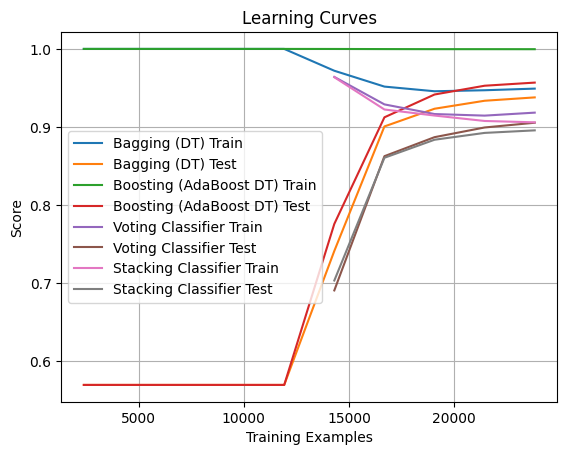


Summary of Evaluation Results:

Bagging (DT):
  Accuracy: 0.85
  Precision: 0.90
  Recall: 0.85
  F1 Score: 0.87
  AUC-ROC: 0.85
  Per-Class Precision: [0.3464788732394366, 0.9607022064744726]
  Per-Class Recall: [0.6684782608695652, 0.8653706658929349]
  Per-Class F1 Score: [0.45640074211502785, 0.9105480079377194]
  Cross-Val Mean: 0.94
  Cross-Val Std: 0.00
  Bias: 0.06
  Variance: 0.00

Boosting (AdaBoost DT):
  Accuracy: 0.86
  Precision: 0.90
  Recall: 0.86
  F1 Score: 0.87
  AUC-ROC: 0.82
  Per-Class Precision: [0.36257763975155277, 0.9575776691373601]
  Per-Class Recall: [0.6345108695652174, 0.880893660235021]
  Per-Class F1 Score: [0.4614624505928854, 0.9176363911137978]
  Cross-Val Mean: 0.96
  Cross-Val Std: 0.00
  Bias: 0.04
  Variance: 0.00

Voting Classifier:
  Accuracy: 0.81
  Precision: 0.90
  Recall: 0.81
  F1 Score: 0.84
  AUC-ROC: 0.83
  Per-Class Precision: [0.29464285714285715, 0.9643652561247216]
  Per-Class Recall: [0.717391304347826, 0.8166255621645148]
  Per-C

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, confusion_matrix, classification_report)
from sklearn.model_selection import cross_val_score, learning_curve, StratifiedKFold

# Selected features
selected_features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15, 16, 18, 20, 23, 25, 27]
X_train_selected = X_hybrid_processed.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]
y_hybrid_processed 
# Define the models with explicit hyperparameters
dt = DecisionTreeClassifier(criterion='gini',
 max_depth= 18,
 max_features= 'sqrt',
 min_samples_leaf= 9,
 min_samples_split=3, 
 random_state= 42)
svm = SVC(C=1.0, kernel='rbf', probability=True, random_state=42)    
lr = LogisticRegression(C=0.1, solver='liblinear', random_state=42)

# Define ensemble models
# Bagging with Decision Tree
# Bagging with Decision Tree
bagging_dt = BaggingClassifier(estimator=dt, n_estimators=50, random_state=42)


# Boosting with AdaBoost and Decision Tree
boosting_dt = AdaBoostClassifier(estimator=dt, n_estimators=50, random_state=42)

# Voting Classifier
voting_clf = VotingClassifier(estimators=[('dt', dt), ('lr', lr)], voting='soft')

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[('dt', dt), ('lr', lr)],
    final_estimator=LogisticRegression(random_state=42),
    passthrough=True
)

# Models to evaluate
models = {

    "Bagging (DT)": bagging_dt,
    "Boosting (AdaBoost DT)": boosting_dt,
    "Voting Classifier": voting_clf,
    "Stacking Classifier": stacking_clf
}

# Evaluate each model
from sklearn.utils.class_weight import compute_class_weight
# Ensure y_hybrid_processed is converted to a NumPy array if needed

y_hybrid_processed_array = np.array(y_hybrid_processed)
y_hybrid_processed_array = y_hybrid_processed_array.ravel()

# Compute class weights with all unique classes
y_classes = np.unique(y_hybrid_processed_array)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=y_classes,
    y=y_hybrid_processed_array
)
class_weight_dict = dict(zip(y_classes, class_weights))
print("Class weights:", class_weight_dict)

evaluation_results = {}
for name, model in models.items():
    print(f"\nTraining and Evaluating {name}...")

    # Train the model
    model.fit(X_train_selected, y_hybrid_processed)

    # Predictions and probabilities
    y_pred = model.predict(X_test_selected)
    y_prob = model.predict_proba(X_test_selected)[:, 1] if hasattr(model, 'predict_proba') else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    # Per-class metrics
    per_class_precision = precision_score(y_test, y_pred, average=None)
    per_class_recall = recall_score(y_test, y_pred, average=None)
    per_class_f1 = f1_score(y_test, y_pred, average=None)

    # Cross-validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train_selected, y_hybrid_processed, cv=cv, scoring='accuracy')
    
    # Bias and Variance
    train_accuracy = np.mean(cross_val_score(model, X_train_selected, y_hybrid_processed, cv=cv, scoring='accuracy'))
    test_accuracy = accuracy
    bias = 1 - train_accuracy  # Estimate of bias
    variance = np.var(cv_scores)  # Estimate of variance

    # Store the results
    evaluation_results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc,
        "Per-Class Precision": per_class_precision.tolist(),
        "Per-Class Recall": per_class_recall.tolist(),
        "Per-Class F1 Score": per_class_f1.tolist(),
        "Cross-Val Mean": cv_scores.mean(),
        "Cross-Val Std": cv_scores.std(),
        "Bias": bias,
        "Variance": variance,
    }

    # Print Metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    if auc is not None:
        print(f"AUC-ROC: {auc:.2f}")
    print(f"Cross-Val Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std():.2f})")
    print(f"Bias: {bias:.2f}")
    print(f"Variance: {variance:.2f}")

    # Per-class metrics
    print("Per-Class Metrics:")
    for i, cls in enumerate(y_classes):
        print(f"  Class {cls} - Precision: {per_class_precision[i]:.2f}, Recall: {per_class_recall[i]:.2f}, F1: {per_class_f1[i]:.2f}")

    # Plot the ROC Curve if probabilities are available
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Finalize ROC Curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Learning Curves
for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_selected, y_hybrid_processed, cv=cv, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label=f'{name} Train')
    plt.plot(train_sizes, test_scores_mean, label=f'{name} Test')

plt.title('Learning Curves')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Summary of Results
print("\nSummary of Evaluation Results:")
for name, metrics in evaluation_results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        if isinstance(value, list):
            print(f"  {metric}: {value}")
        else:
            print(f"  {metric}: {value:.2f}")


Model bias and variance


Class weights: {0: 0.8778330019880716, 1: 1.1616679821099711}

Training and Evaluating Bagging (DT)...


C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was pass

Accuracy: 0.85
Precision: 0.90
Recall: 0.85
F1 Score: 0.87
AUC-ROC: 0.85
Cross-Val Accuracy: 0.94 (+/- 0.00)
Bias: 0.06
Variance: 0.00
Per-Class Metrics:
  Class 0 - Precision: 0.35, Recall: 0.67, F1: 0.46
  Class 1 - Precision: 0.96, Recall: 0.87, F1: 0.91

Training and Evaluating Boosting (AdaBoost DT)...


C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprec

Accuracy: 0.86
Precision: 0.90
Recall: 0.86
F1 Score: 0.87
AUC-ROC: 0.82
Cross-Val Accuracy: 0.96 (+/- 0.00)
Bias: 0.04
Variance: 0.00
Per-Class Metrics:
  Class 0 - Precision: 0.36, Recall: 0.63, F1: 0.46
  Class 1 - Precision: 0.96, Recall: 0.88, F1: 0.92

Training and Evaluating Voting Classifier...


C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:132: DataConversi

Accuracy: 0.81
Precision: 0.90
Recall: 0.81
F1 Score: 0.84
AUC-ROC: 0.83
Cross-Val Accuracy: 0.91 (+/- 0.01)
Bias: 0.09
Variance: 0.00
Per-Class Metrics:
  Class 0 - Precision: 0.29, Recall: 0.72, F1: 0.42
  Class 1 - Precision: 0.96, Recall: 0.82, F1: 0.88

Training and Evaluating Stacking Classifier...


C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative 

Accuracy: 0.78
Precision: 0.90
Recall: 0.78
F1 Score: 0.82
AUC-ROC: 0.83
Cross-Val Accuracy: 0.90 (+/- 0.01)
Bias: 0.10
Variance: 0.00
Per-Class Metrics:
  Class 0 - Precision: 0.26, Recall: 0.74, F1: 0.39
  Class 1 - Precision: 0.97, Recall: 0.78, F1: 0.86

Training and Evaluating XGBoost...


C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [10:01:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [10:01:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [10:01:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg,

Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.90
AUC-ROC: 0.85
Cross-Val Accuracy: 0.95 (+/- 0.00)
Bias: 0.05
Variance: 0.00
Per-Class Metrics:
  Class 0 - Precision: 0.48, Recall: 0.57, F1: 0.52
  Class 1 - Precision: 0.95, Recall: 0.93, F1: 0.94


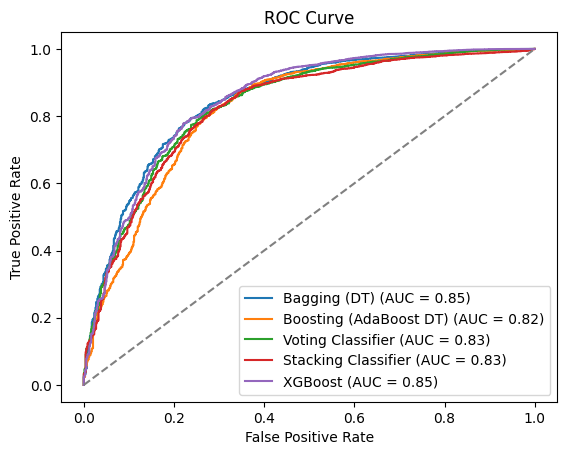

C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\96653\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\96653\AppData\Roaming\Python\Python312\site-

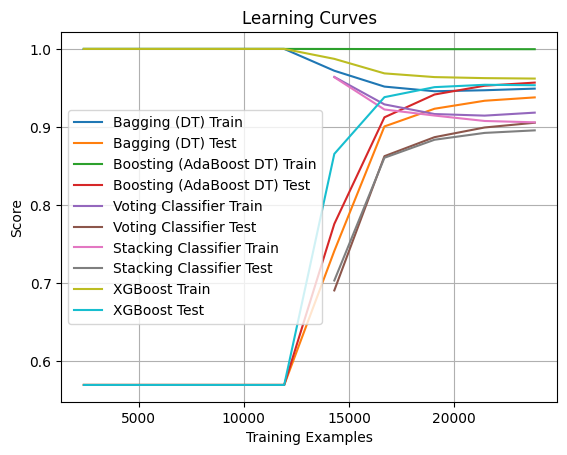


Summary of Evaluation Results:

Bagging (DT):
  Accuracy: 0.85
  Precision: 0.90
  Recall: 0.85
  F1 Score: 0.87
  AUC-ROC: 0.85
  Per-Class Precision: [0.3464788732394366, 0.9607022064744726]
  Per-Class Recall: [0.6684782608695652, 0.8653706658929349]
  Per-Class F1 Score: [0.45640074211502785, 0.9105480079377194]
  Cross-Val Mean: 0.94
  Cross-Val Std: 0.00
  Bias: 0.06
  Variance: 0.00

Boosting (AdaBoost DT):
  Accuracy: 0.86
  Precision: 0.90
  Recall: 0.86
  F1 Score: 0.87
  AUC-ROC: 0.82
  Per-Class Precision: [0.36257763975155277, 0.9575776691373601]
  Per-Class Recall: [0.6345108695652174, 0.880893660235021]
  Per-Class F1 Score: [0.4614624505928854, 0.9176363911137978]
  Cross-Val Mean: 0.96
  Cross-Val Std: 0.00
  Bias: 0.04
  Variance: 0.00

Voting Classifier:
  Accuracy: 0.81
  Precision: 0.90
  Recall: 0.81
  F1 Score: 0.84
  AUC-ROC: 0.83
  Per-Class Precision: [0.29464285714285715, 0.9643652561247216]
  Per-Class Recall: [0.717391304347826, 0.8166255621645148]
  Per-C

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, confusion_matrix, classification_report)
from sklearn.model_selection import cross_val_score, learning_curve, StratifiedKFold

# Selected features
selected_features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15, 16, 18, 20, 23, 25, 27]
X_train_selected = X_hybrid_processed.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]
y_hybrid_processed 
# Define the models with explicit hyperparameters
dt = DecisionTreeClassifier(criterion='gini',
 max_depth= 18,
 max_features= 'sqrt',
 min_samples_leaf= 9,
 min_samples_split=3, 
 random_state= 42)
svm = SVC(C=1.0, kernel='rbf', probability=True, random_state=42)    
lr = LogisticRegression(C=0.1, solver='liblinear', random_state=42)
# Import XGBoost
from xgboost import XGBClassifier

# Define XGBoost model
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    scale_pos_weight=class_weights[1] / class_weights[0],  # Handle class imbalance
    random_state=42,
    use_label_encoder=False,  # For newer versions of XGBoost
    eval_metric='logloss'     # Suppress warnings
)

# Add XGBoost to the models dictionary



# Define ensemble models
# Bagging with Decision Tree
# Bagging with Decision Tree
bagging_dt = BaggingClassifier(estimator=dt, n_estimators=50, random_state=42)


# Boosting with AdaBoost and Decision Tree
boosting_dt = AdaBoostClassifier(estimator=dt, n_estimators=50, random_state=42)

# Voting Classifier
voting_clf = VotingClassifier(estimators=[('dt', dt), ('lr', lr)], voting='soft')

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[('dt', dt), ('lr', lr)],
    final_estimator=LogisticRegression(random_state=42),
    passthrough=True
)

# Models to evaluate
models = {

    "Bagging (DT)": bagging_dt,
    "Boosting (AdaBoost DT)": boosting_dt,
    "Voting Classifier": voting_clf,
    "Stacking Classifier": stacking_clf
}
models["XGBoost"] = xgb
# Evaluate each model
from sklearn.utils.class_weight import compute_class_weight
# Ensure y_hybrid_processed is converted to a NumPy array if needed

y_hybrid_processed_array = np.array(y_hybrid_processed)
y_hybrid_processed_array = y_hybrid_processed_array.ravel()

# Compute class weights with all unique classes
y_classes = np.unique(y_hybrid_processed_array)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=y_classes,
    y=y_hybrid_processed_array
)
class_weight_dict = dict(zip(y_classes, class_weights))
print("Class weights:", class_weight_dict)

evaluation_results = {}
for name, model in models.items():
    print(f"\nTraining and Evaluating {name}...")

    # Train the model
    model.fit(X_train_selected, y_hybrid_processed)

    # Predictions and probabilities
    y_pred = model.predict(X_test_selected)
    y_prob = model.predict_proba(X_test_selected)[:, 1] if hasattr(model, 'predict_proba') else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    # Per-class metrics
    per_class_precision = precision_score(y_test, y_pred, average=None)
    per_class_recall = recall_score(y_test, y_pred, average=None)
    per_class_f1 = f1_score(y_test, y_pred, average=None)

    # Cross-validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train_selected, y_hybrid_processed, cv=cv, scoring='accuracy')
    
    # Bias and Variance
    train_accuracy = np.mean(cross_val_score(model, X_train_selected, y_hybrid_processed, cv=cv, scoring='accuracy'))
    test_accuracy = accuracy
    bias = 1 - train_accuracy  # Estimate of bias
    variance = np.var(cv_scores)  # Estimate of variance

    # Store the results
    evaluation_results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc,
        "Per-Class Precision": per_class_precision.tolist(),
        "Per-Class Recall": per_class_recall.tolist(),
        "Per-Class F1 Score": per_class_f1.tolist(),
        "Cross-Val Mean": cv_scores.mean(),
        "Cross-Val Std": cv_scores.std(),
        "Bias": bias,
        "Variance": variance,
    }

    # Print Metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    if auc is not None:
        print(f"AUC-ROC: {auc:.2f}")
    print(f"Cross-Val Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std():.2f})")
    print(f"Bias: {bias:.2f}")
    print(f"Variance: {variance:.2f}")

    # Per-class metrics
    print("Per-Class Metrics:")
    for i, cls in enumerate(y_classes):
        print(f"  Class {cls} - Precision: {per_class_precision[i]:.2f}, Recall: {per_class_recall[i]:.2f}, F1: {per_class_f1[i]:.2f}")

    # Plot the ROC Curve if probabilities are available
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Finalize ROC Curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Learning Curves
for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_selected, y_hybrid_processed, cv=cv, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label=f'{name} Train')
    plt.plot(train_sizes, test_scores_mean, label=f'{name} Test')

plt.title('Learning Curves')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Summary of Results
print("\nSummary of Evaluation Results:")
for name, metrics in evaluation_results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        if isinstance(value, list):
            print(f"  {metric}: {value}")
        else:
            print(f"  {metric}: {value:.2f}")
